# Тестовое задание, Тяпкина Анастасия

#  Задача

**Требования к выходным данным:**
1) В выходной таблице должны остаться только следующие колонки: area, cluster, cluster_name, keyword, x, y, count, color
2) Колонку color нужно добавить самостоятельно - цвета вы можете взять из цветовых палеток Tableu или по своему усмотрению.
3) Цвет задается каждому словосочетанию согласно следующими правилам:
     1. внутри одной области цвета словосочетаний в одном кластере должны быть одинаковые, в разных - отличаться (например, у "Кластер 1" все слова будут окрашены в красный, у "Кластер 2" - в зеленый и т.д.)
    2. цвета кластеров в разных областях могут повторяться
    3. цвета кластеров в разных областях с разным номером не имеют никакой связи (у одной области [area] слова из "Кластер 1" могут быть красного цвета, в другой области у слов из "Кластер 1" может быть другой цвет)
    3) Не должно быть дубликатов слов в одной и той же области (area), но словосочетание может повторяться из area в area
4) Колонки должны называться именно так, как указано в п.1
5) Сортировка должна происходить по колонкам area, cluster, cluster_name, count (по count значения сортируются в убывающем порядке, в остальных - по возрастающему).
6) Количество переданных в исходных ключевых слов должно совпадать с количество слов в выходных данных (за исключением дублированных строк или строк с пустыми\неформатными значениями по ключевым показателям [перечислены в п. 1], если такие имеются).
7) Никакие другие особенности оформления не должны учитываться при обработке данных (заливка и пр.)
8) Выходные данные должны быть аккуратно оформлены (заголовки закреплены, включен фильтр)

Формат представления выходных данных: google spreadsheet-таблица.

**Часть 2. Построение графиков**
Построить по одной диаграмме рассеяния для каждой области (area) (пример внешнего вида см. в приложенном svg-файле).
Требования к визуализации:
1. Наличие Footer-подписи на изображении
2. Наличие легенды цветов и кластеров
3. Перенос слишком длинных словосочетаний (например, слова длиннее 15 символов, можно разбить на "solar\n cell")
4. Минимизация наложения (слепливания) подписей к друг на друга (постарайтесь сделать так, чтобы наложение было минимальным)
5. Обводка точек.

Формат представления выходных данных: png-файлы размером не менее 1500х1500 пикселей с визуализациями  для каждой области (area).

**Требования к результатам:**
1. Код для первой части задания
2. Код для второй части задания
3. Таблица с трансформированными данными
4. Набор визуализаций
5. Предпочтительный формат представления кода - GitHub или gist.github, визуализаций и таблиц - Google Docs


# Код для первой части задания

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import seaborn as sns
sns.set_style('white')

## Загрузка данных

In [2]:
df = pd.read_csv('C:\\Users\\Кек\\Desktop\\HSE_test\\tz_data.csv')
# создание копии датафрейма
df_raw = df

## Описание данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          228 non-null    object 
 1   cluster       228 non-null    float64
 2   cluster_name  228 non-null    object 
 3   keyword       228 non-null    object 
 4   good (1)      227 non-null    float64
 5   count         227 non-null    object 
 6   x             228 non-null    float64
 7   y             228 non-null    object 
dtypes: float64(3), object(5)
memory usage: 14.4+ KB


In [4]:
df.sample(5)

,area,cluster,cluster_name,keyword,good (1),count,x,y
79,locator,0.0,Кластер 0,auditor transparent,1.0,421,0.127798,12.725469140530215
35,available,1.0,Кластер 1,signed reception,1.0,1793,9.560871,6.234035288942436
114,ar\vr,2.0,Кластер 2,bangkok mining fascinating,1.0,682,5.084247,13.480030560991166
104,worlds,3.0,Кластер 3,exchanges castle,1.0,1097,8.082231,6.587932953846258
4,eligibility,1.0,Кластер 1,decision surgeons montreal,1.0,823,3.283940,4.39674063521296


В исходном файле есть следующие поля:
- поле **area** - область, формат object 
- поле **cluster** - область, формат float64
- поле **cluster_name** - название кластера, формат object
- поле **keyword** - словосочетание, формат object
- поле **good (1)** - поле, не указаное в тестовом задании, которое не должно остаться на выходе, формат float64
- поле **count** -  показатель, формат object
- поле **x** - координата х для диаграммы рассеяния, формат float64
- поле **y** - координата у для диаграммы рассеяния, формат float64

Всего в файле 228 строк, поле **good (1)** содержит одно пустое значение

## Анализ  и предобработка входного датафрейма

### Обработка значений Nan

Для начала посмотрим на количество полей со значением Nan

In [5]:
df.isna().sum()

area            1
cluster         1
cluster_name    1
keyword         1
good (1)        2
count           2
x               1
y               1
dtype: int64

Видно, что почти везде одно значение Nan, кроме полей **good (1)**, **count**. Найдем данные строки

In [6]:
df[df.isna().any(axis=1)]

,area,cluster,cluster_name,keyword,good (1),count,x,y
96,worlds,1.0,Кластер 1,operating stevens nirvana,NaN,381,3.585101,1.1168487718141744
178,housewives,2.0,Кластер 2,outstanding relations,1.0,NaN,1.289158,6.397514584626231
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Строка 193 полностью состоит из значений Nan, её можно удалить. Стока 96 содержит Nan в ненужном нам поле **good (1)**, её оставим, строка 178 содержит Nan в поле **count**. Поскольку это всего лишь одно значение, то её удаление не исказит результаты исследование, и без этого значение Nan мы сможем преобразовать поле **count** к типу int для последующей работы с этим полем как с числовым

In [7]:
# Удаление двух строк с Nan (не воспользовалась dropna, так как сохраняю строку где Nan в поле good (1))
df = df.drop([df.index[178] , df.index[193]]).reset_index()

df[df.isna().any(axis=1)]

,index,area,cluster,cluster_name,keyword,good (1),count,x,y
96,96,worlds,1.0,Кластер 1,operating stevens nirvana,NaN,381,3.585101,1.1168487718141744


### Удаление столбца good (1)	

Удалим поле **good (1)** и поле индекс, возникшее после reset_index()

In [8]:
df.drop(['good (1)', 'index'], axis=1, inplace = True)
df.head()

,area,cluster,cluster_name,keyword,count,x,y
0,eligibility,0.0,Кластер 0,several animated buried,1260,5.772342,12.564796257345005
1,eligibility,0.0,Кластер 0,singles unusual buyers,866,14.829280,7.8507285727125815
2,eligibility,0.0,Кластер 0,hawaiian directive,163,11.381856,3.8981370219558604
3,eligibility,0.0,Кластер 0,dynamics directly,1146,9.980149,6.281427914064545
4,eligibility,1.0,Кластер 1,decision surgeons montreal,823,3.283940,4.39674063521296


### Изменение типов данных

Совершим следующие преобразования типов данных:
1. Преобразуем поле **cluster** к целочисленному типу данных
2. Преобразуем поле **count** к целочисленному типу данных
3. Преобразуем поле **y** к вещественному типу данных

In [9]:
columns = ['cluster', 'count']
for col in columns:
    df[col] = df[col].replace(['N\\A', '-'], -9999).astype('int64')


При попытке преобразовать у к вещественному типу была найдена строка с ошибочным значением координаты у равным 0x414fe002, удалим эту строку 

In [10]:
df[df['y'] == '0x414fe002']

,area,cluster,cluster_name,keyword,count,x,y
99,worlds,2,Кластер 2,applicants vacuum distance restrictions,1785,11.916011,0x414fe002


In [11]:
df = df.drop([df.index[99]]).reset_index()


In [12]:
df.drop(['index'], axis=1, inplace = True)
df.head()

,area,cluster,cluster_name,keyword,count,x,y
0,eligibility,0,Кластер 0,several animated buried,1260,5.772342,12.564796257345005
1,eligibility,0,Кластер 0,singles unusual buyers,866,14.829280,7.8507285727125815
2,eligibility,0,Кластер 0,hawaiian directive,163,11.381856,3.8981370219558604
3,eligibility,0,Кластер 0,dynamics directly,1146,9.980149,6.281427914064545
4,eligibility,1,Кластер 1,decision surgeons montreal,823,3.283940,4.39674063521296


In [13]:
df['y'] = df['y'].astype('float64')

В процессе было обнаржуено два значения поля **count** cо строковыми обозначениями 'N//A', '-', пока мы заменили их на -9999 для дальнейшей работы с полем **count**

In [14]:
df[df['count'] == -9999]

,area,cluster,cluster_name,keyword,count,x,y
49,protein,0,Кластер 0,malawi sunset,-9999,14.059563,11.980079
214,greetings,1,Кластер 1,diversity unlike,-9999,9.195444,11.261367


### Анализ уникальных значений

Проверим датафрейм на наличие неявных дубликатов 

In [15]:
for i in ['area', 'cluster_name']:
    print(f'Уникальные значения в поле {i} : {df[i].unique()}')
    print()

Уникальные значения в поле area : ['eligibility' 'capability' 'available' 'protein' 'winner' 'locator'
 'worlds' 'ar\\vr' 'twisted' 'lithuania' 'personnel' 'housewives' 'dialog'
 'except' 'greetings']

Уникальные значения в поле cluster_name : ['Кластер 0' 'Кластер 1' 'Кластер 2' 'Кластер 3']



## Обработка условия "Не должно быть дубликатов слов в одной и той же области (area), но словосочетание может повторяться из area в area"


In [16]:
df[df['area'] == 'eligibility']

,area,cluster,cluster_name,keyword,count,x,y
0,eligibility,0,Кластер 0,several animated buried,1260,5.772342,12.564796
1,eligibility,0,Кластер 0,singles unusual buyers,866,14.829280,7.850729
2,eligibility,0,Кластер 0,hawaiian directive,163,11.381856,3.898137
3,eligibility,0,Кластер 0,dynamics directly,1146,9.980149,6.281428
4,eligibility,1,Кластер 1,decision surgeons montreal,823,3.283940,4.396741
5,eligibility,1,Кластер 1,knives everybody,1377,5.607192,13.155189
6,eligibility,1,Кластер 1,lighting observe,281,11.419919,3.161711
7,eligibility,1,Кластер 1,payday oriental,1501,8.035720,2.965695
8,eligibility,1,Кластер 1,vampire injured,139,5.247683,0.779161
9,eligibility,2,Кластер 2,vampire injured,139,5.247683,0.779161


Мы видим, что для области **eligibility** повторяются значения **keyword** - строки 8 и 9 - vampire injured	
По условию задания **Не должно быть дубликатов слов в одной и той же области (area), но словосочетание может повторяться из area в area**

В задании ничего не сказано о том, что эти кейворды находятся в разных кластерах

Поскольку это тестовое задание и нет возможности уточнить у заказчика, являются ли данные строки нужными для обоих кластеров, удалим такие дубликаты. 

In [17]:
area_list = df['area'].unique().tolist()
area_list

['eligibility',
 'capability',
 'available',
 'protein',
 'winner',
 'locator',
 'worlds',
 'ar\\vr',
 'twisted',
 'lithuania',
 'personnel',
 'housewives',
 'dialog',
 'except',
 'greetings']

In [18]:
index_list = []
for area in area_list:
    indexes = df[df['area'] == area][df[df['area'] == area].duplicated(subset=['keyword'])].index.tolist()
    index_list.extend(indexes)

In [19]:
index_list

[9, 15, 116, 124, 134, 192, 218]

In [20]:
df = df.drop(index=(index_list)).reset_index()

In [21]:
df = df.drop(['index'], axis=1)
df.head()

,area,cluster,cluster_name,keyword,count,x,y
0,eligibility,0,Кластер 0,several animated buried,1260,5.772342,12.564796
1,eligibility,0,Кластер 0,singles unusual buyers,866,14.829280,7.850729
2,eligibility,0,Кластер 0,hawaiian directive,163,11.381856,3.898137
3,eligibility,0,Кластер 0,dynamics directly,1146,9.980149,6.281428
4,eligibility,1,Кластер 1,decision surgeons montreal,823,3.283940,4.396741


## Создание столбца color

По условию задания колонку color нужно добавить самостоятельно - цвета вы можете взять из цветовых палеток Tableu или по своему усмотрению.

Цвет задается каждому словосочетанию согласно следующими правилам:
1. внутри одной области цвета словосочетаний в одном кластере должны быть одинаковые, в разных - отличаться (например, у "Кластер 1 все слова будут окрашены в красный, у "Кластер 2" - в зеленый и т.д.)
2. цвета кластеров в разных областях могут повторяться
3. цвета кластеров в разных областях с разным номером не имеют никакой связи (у одной области [area] слова из "Кластер 1" могут быть красного цвета, в другой области у слов из "Кластер 1" может быть другой цвет)


Рандомно выберем каждой области 4 цвета из палетки **TABLEAU_COLORS**, так что внутри области цвета не могут повторяться, но между областями могут, для этого создадим словарь dict_area_color. Затем сопоставим его с area в датафрейме с помощью функции apply

In [22]:
color_dict = mcolors.TABLEAU_COLORS
color_dict

OrderedDict([('tab:blue', '#1f77b4'),
             ('tab:orange', '#ff7f0e'),
             ('tab:green', '#2ca02c'),
             ('tab:red', '#d62728'),
             ('tab:purple', '#9467bd'),
             ('tab:brown', '#8c564b'),
             ('tab:pink', '#e377c2'),
             ('tab:gray', '#7f7f7f'),
             ('tab:olive', '#bcbd22'),
             ('tab:cyan', '#17becf')])

In [23]:
dict_area_color = {area: random.sample(list(color_dict.values()), 4)  for area in area_list}
dict_area_color

{'eligibility': ['#17becf', '#ff7f0e', '#e377c2', '#9467bd'],
 'capability': ['#ff7f0e', '#1f77b4', '#2ca02c', '#bcbd22'],
 'available': ['#17becf', '#9467bd', '#d62728', '#bcbd22'],
 'protein': ['#ff7f0e', '#bcbd22', '#17becf', '#1f77b4'],
 'winner': ['#2ca02c', '#9467bd', '#bcbd22', '#1f77b4'],
 'locator': ['#e377c2', '#2ca02c', '#9467bd', '#ff7f0e'],
 'worlds': ['#9467bd', '#ff7f0e', '#7f7f7f', '#17becf'],
 'ar\\vr': ['#d62728', '#17becf', '#ff7f0e', '#8c564b'],
 'twisted': ['#e377c2', '#9467bd', '#ff7f0e', '#1f77b4'],
 'lithuania': ['#ff7f0e', '#7f7f7f', '#bcbd22', '#8c564b'],
 'personnel': ['#ff7f0e', '#17becf', '#d62728', '#e377c2'],
 'housewives': ['#7f7f7f', '#e377c2', '#9467bd', '#2ca02c'],
 'dialog': ['#8c564b', '#17becf', '#1f77b4', '#7f7f7f'],
 'except': ['#d62728', '#17becf', '#2ca02c', '#ff7f0e'],
 'greetings': ['#1f77b4', '#e377c2', '#8c564b', '#ff7f0e']}

In [24]:
df['color'] = df.apply(lambda row: dict_area_color[row['area']][row['cluster']], axis=1)
df.head()

,area,cluster,cluster_name,keyword,count,x,y,color
0,eligibility,0,Кластер 0,several animated buried,1260,5.772342,12.564796,#17becf
1,eligibility,0,Кластер 0,singles unusual buyers,866,14.829280,7.850729,#17becf
2,eligibility,0,Кластер 0,hawaiian directive,163,11.381856,3.898137,#17becf
3,eligibility,0,Кластер 0,dynamics directly,1146,9.980149,6.281428,#17becf
4,eligibility,1,Кластер 1,decision surgeons montreal,823,3.283940,4.396741,#ff7f0e


## Сортировка

In [25]:
df_sorted = df.sort_values(by = ['area', 'cluster', 'cluster_name', 'count'], ascending=[True, True, True, False])

In [26]:
df_sorted

,area,cluster,cluster_name,keyword,count,x,y,color
103,ar\vr,0,Кластер 0,written conflict fabulous,1443,2.991167,7.106799,#d62728
105,ar\vr,0,Кластер 0,reservations linking,751,10.195602,12.259496,#d62728
104,ar\vr,0,Кластер 0,interfaces neutral,586,10.443533,13.809915,#d62728
106,ar\vr,0,Кластер 0,committees parallel,173,6.735260,3.613983,#d62728
107,ar\vr,1,Кластер 1,postcards looked republic detector,1397,10.474474,6.220012,#17becf
...,...,...,...,...,...,...,...,...
97,worlds,2,Кластер 2,ringtone parental,471,11.723895,4.363994,#7f7f7f
99,worlds,2,Кластер 2,recipient traffic,236,5.593629,0.553368,#7f7f7f
102,worlds,3,Кластер 3,immunology plates,1653,2.407028,7.651527,#17becf
100,worlds,3,Кластер 3,holdings herbal,1476,3.986508,10.906340,#17becf


## Выгрузка обработанной таблицы

In [27]:
df_sorted.to_csv("C:\\Users\\Кек\\Desktop\\HSE_test\\final_df.csv")

## Вывод
В первой части задания были сделаны сдеюущие операции 
1. Проанализирован датафрейм, проведена предобработка данных - убрано поле goods (1), заменены типы данных, убраны значения Nan и неккоректные значения
2. Убраны дубликаты по keywords
3. Создан столбец color

# Код для второй части задания

## Графики

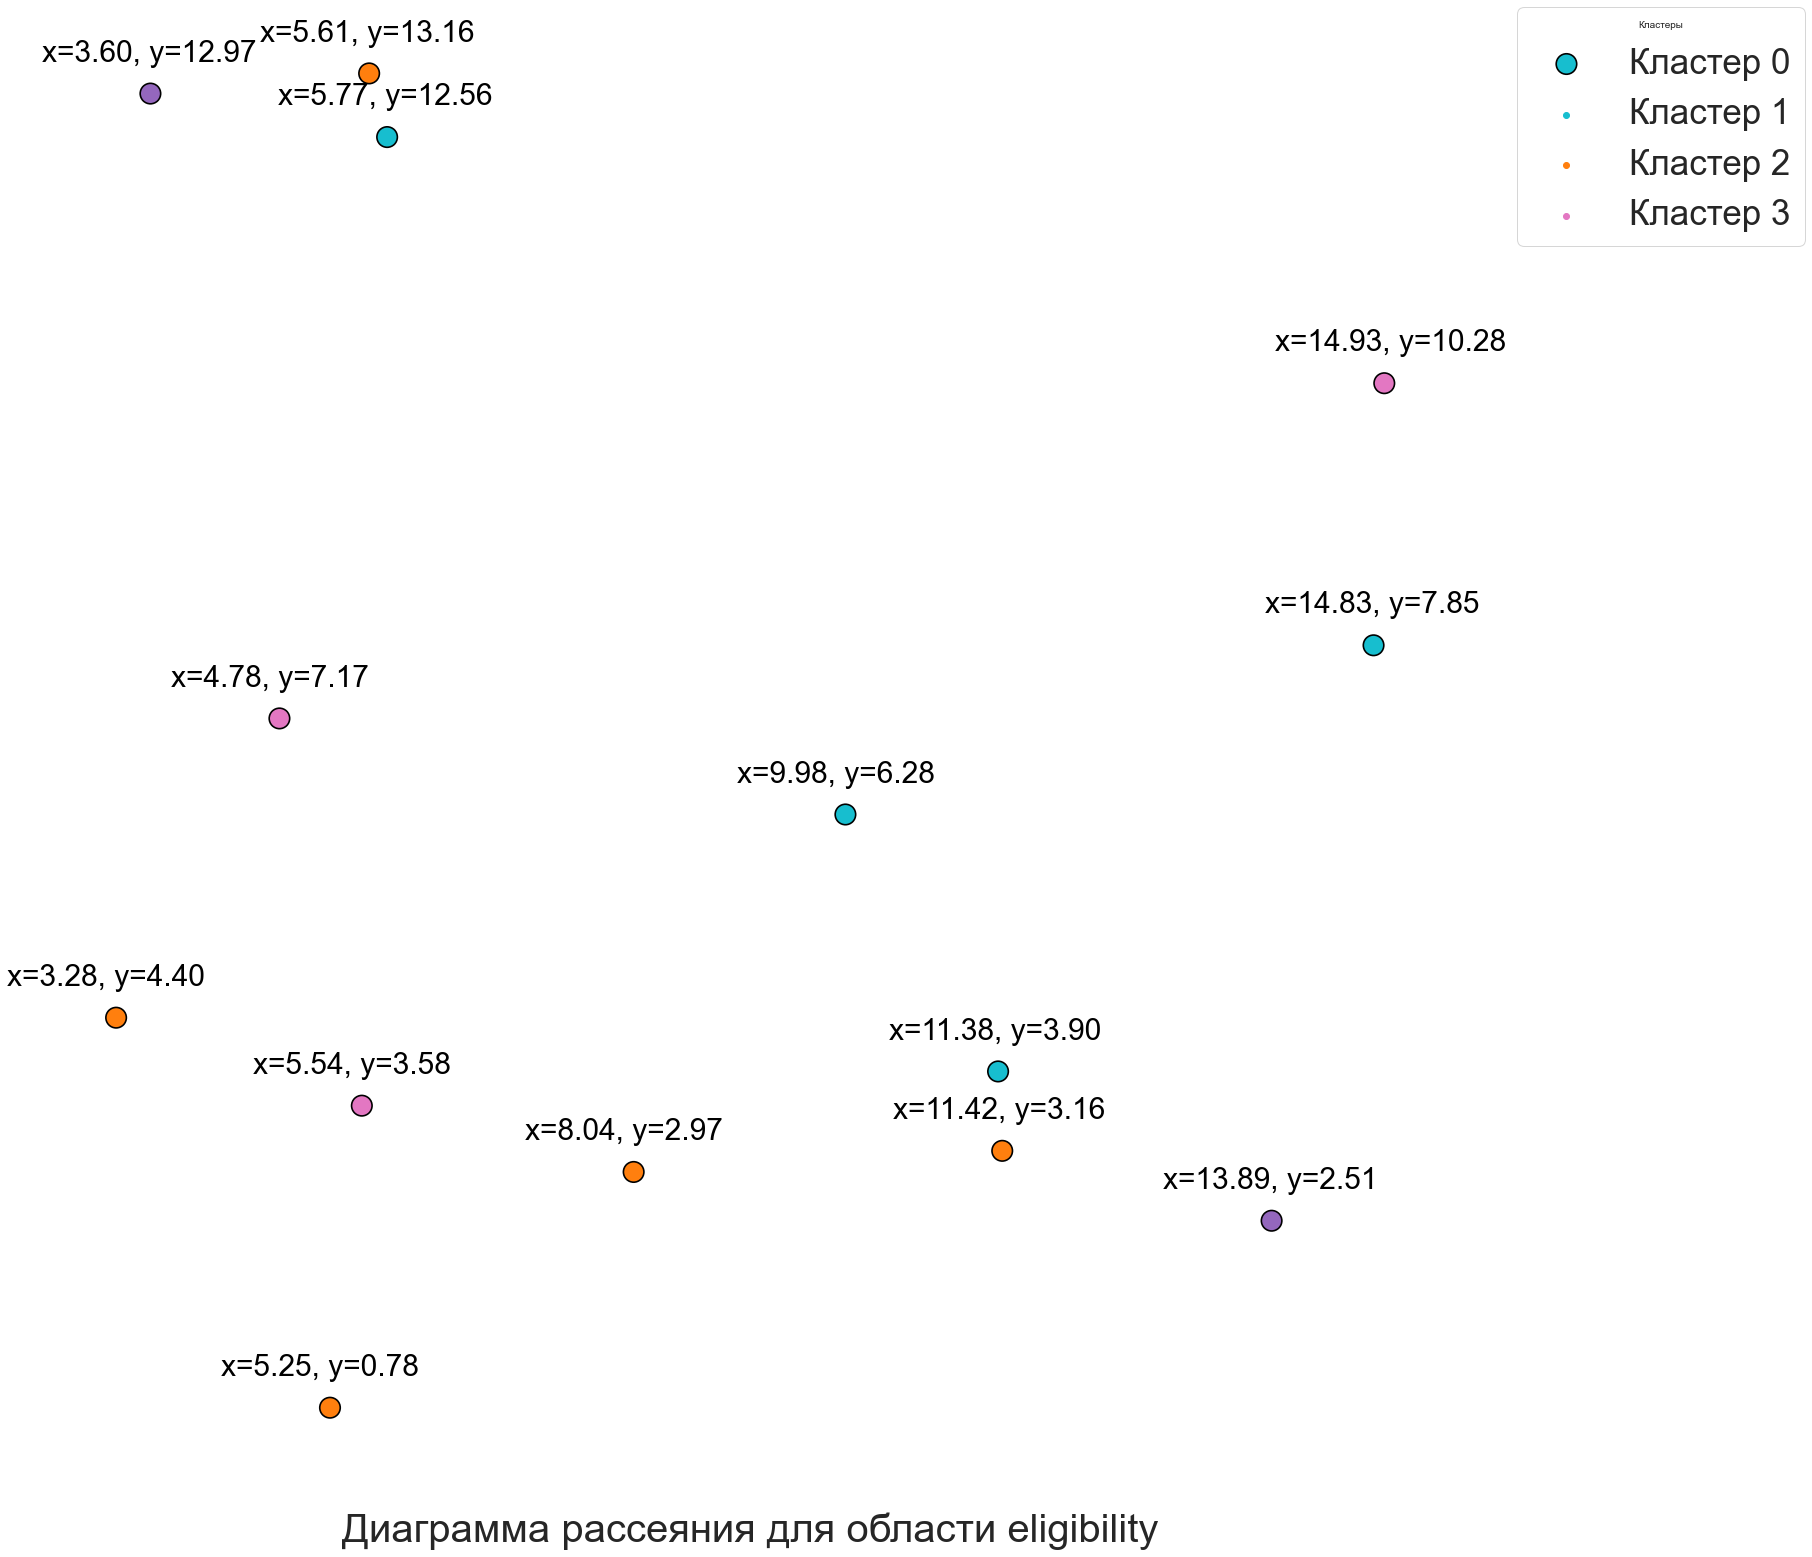

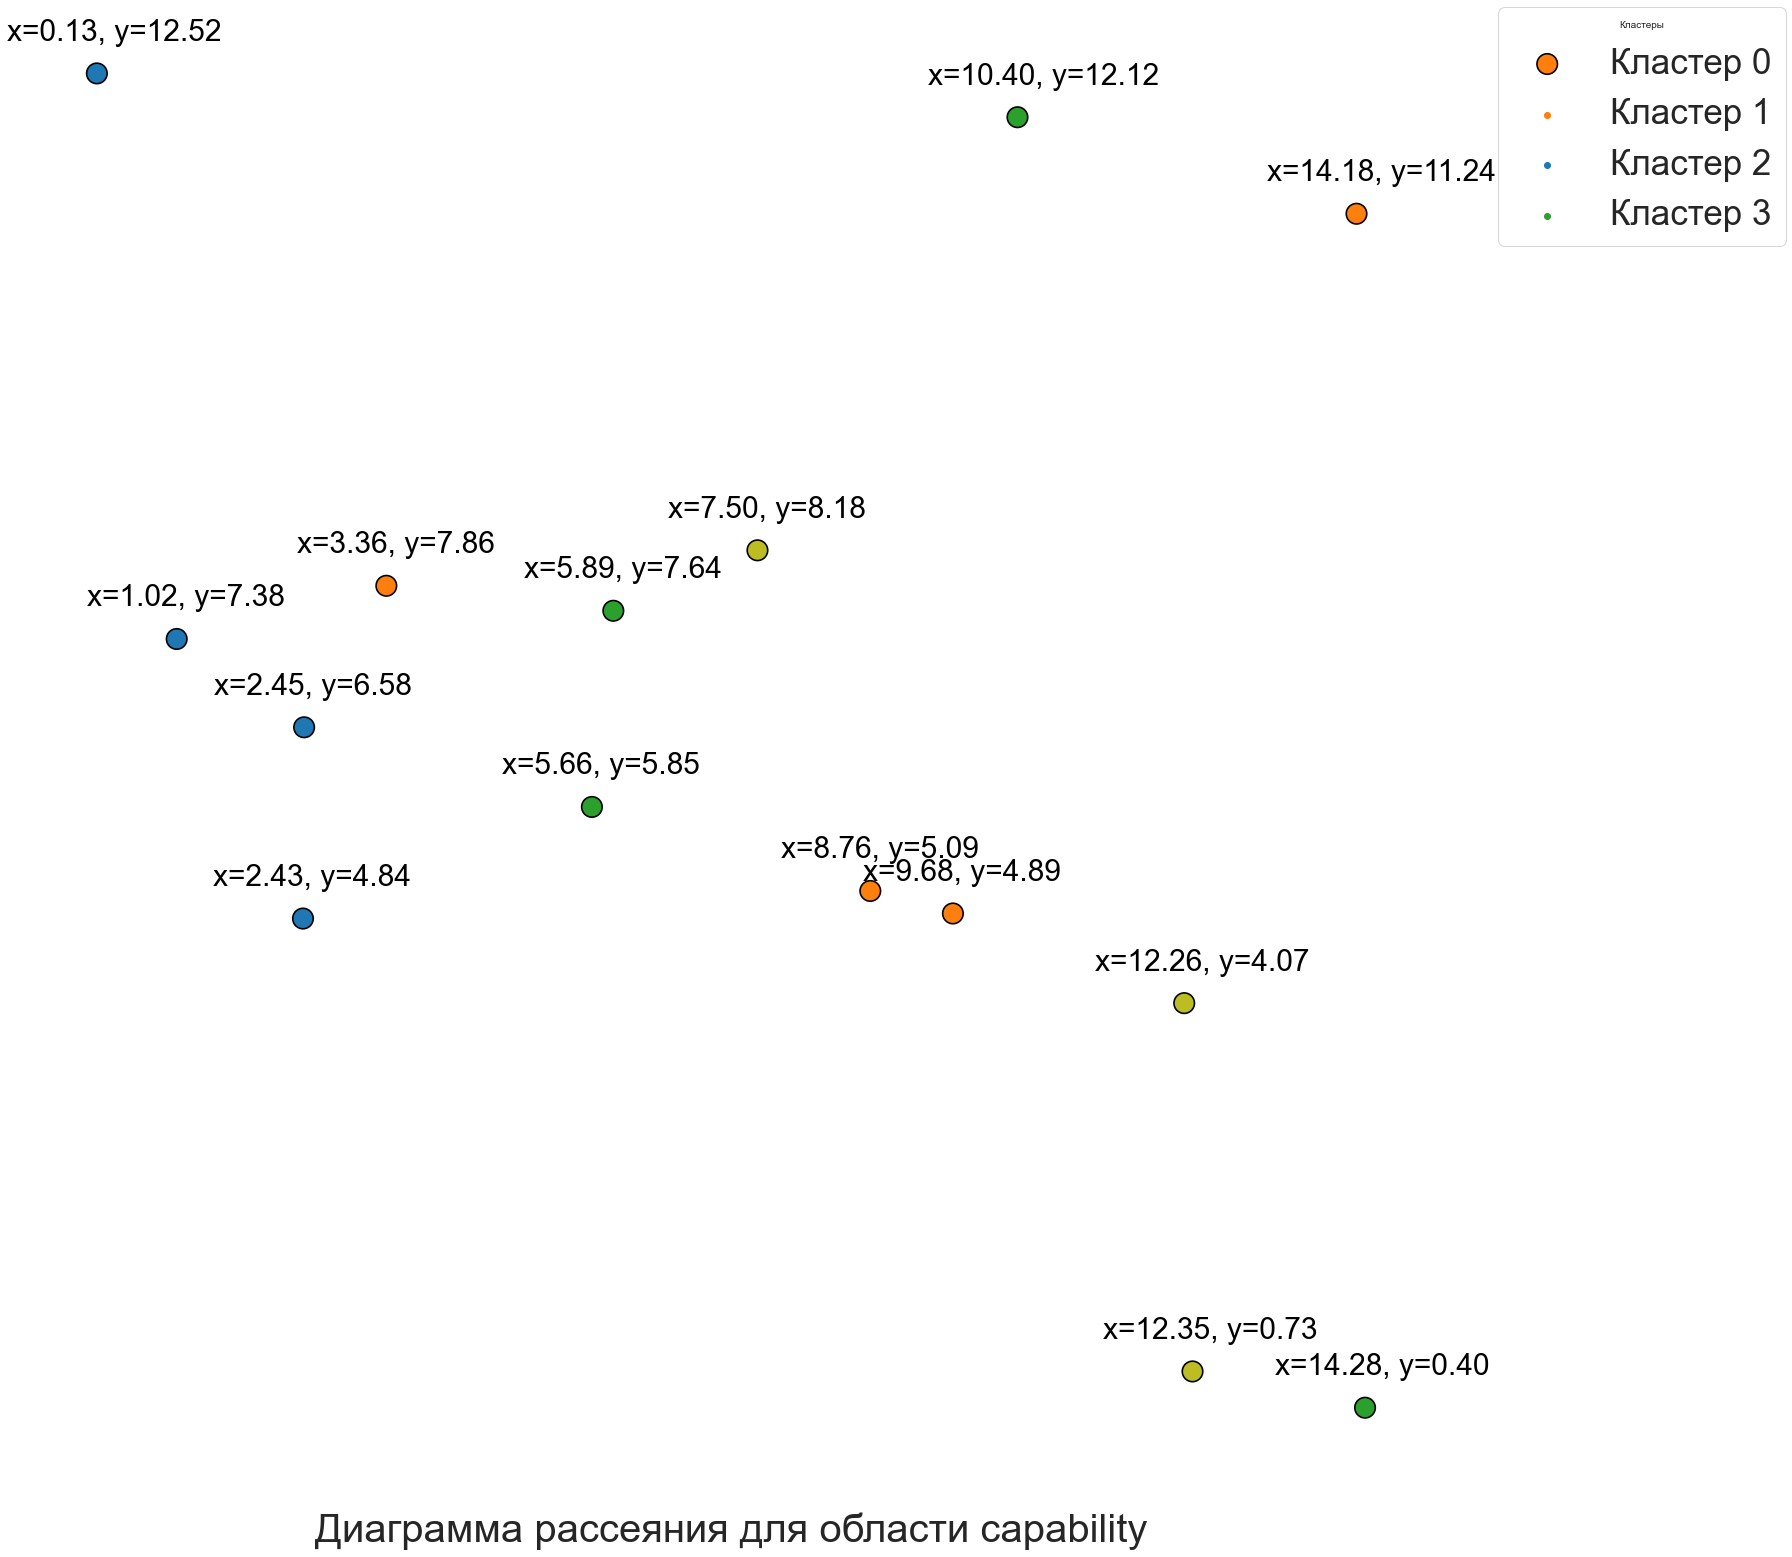

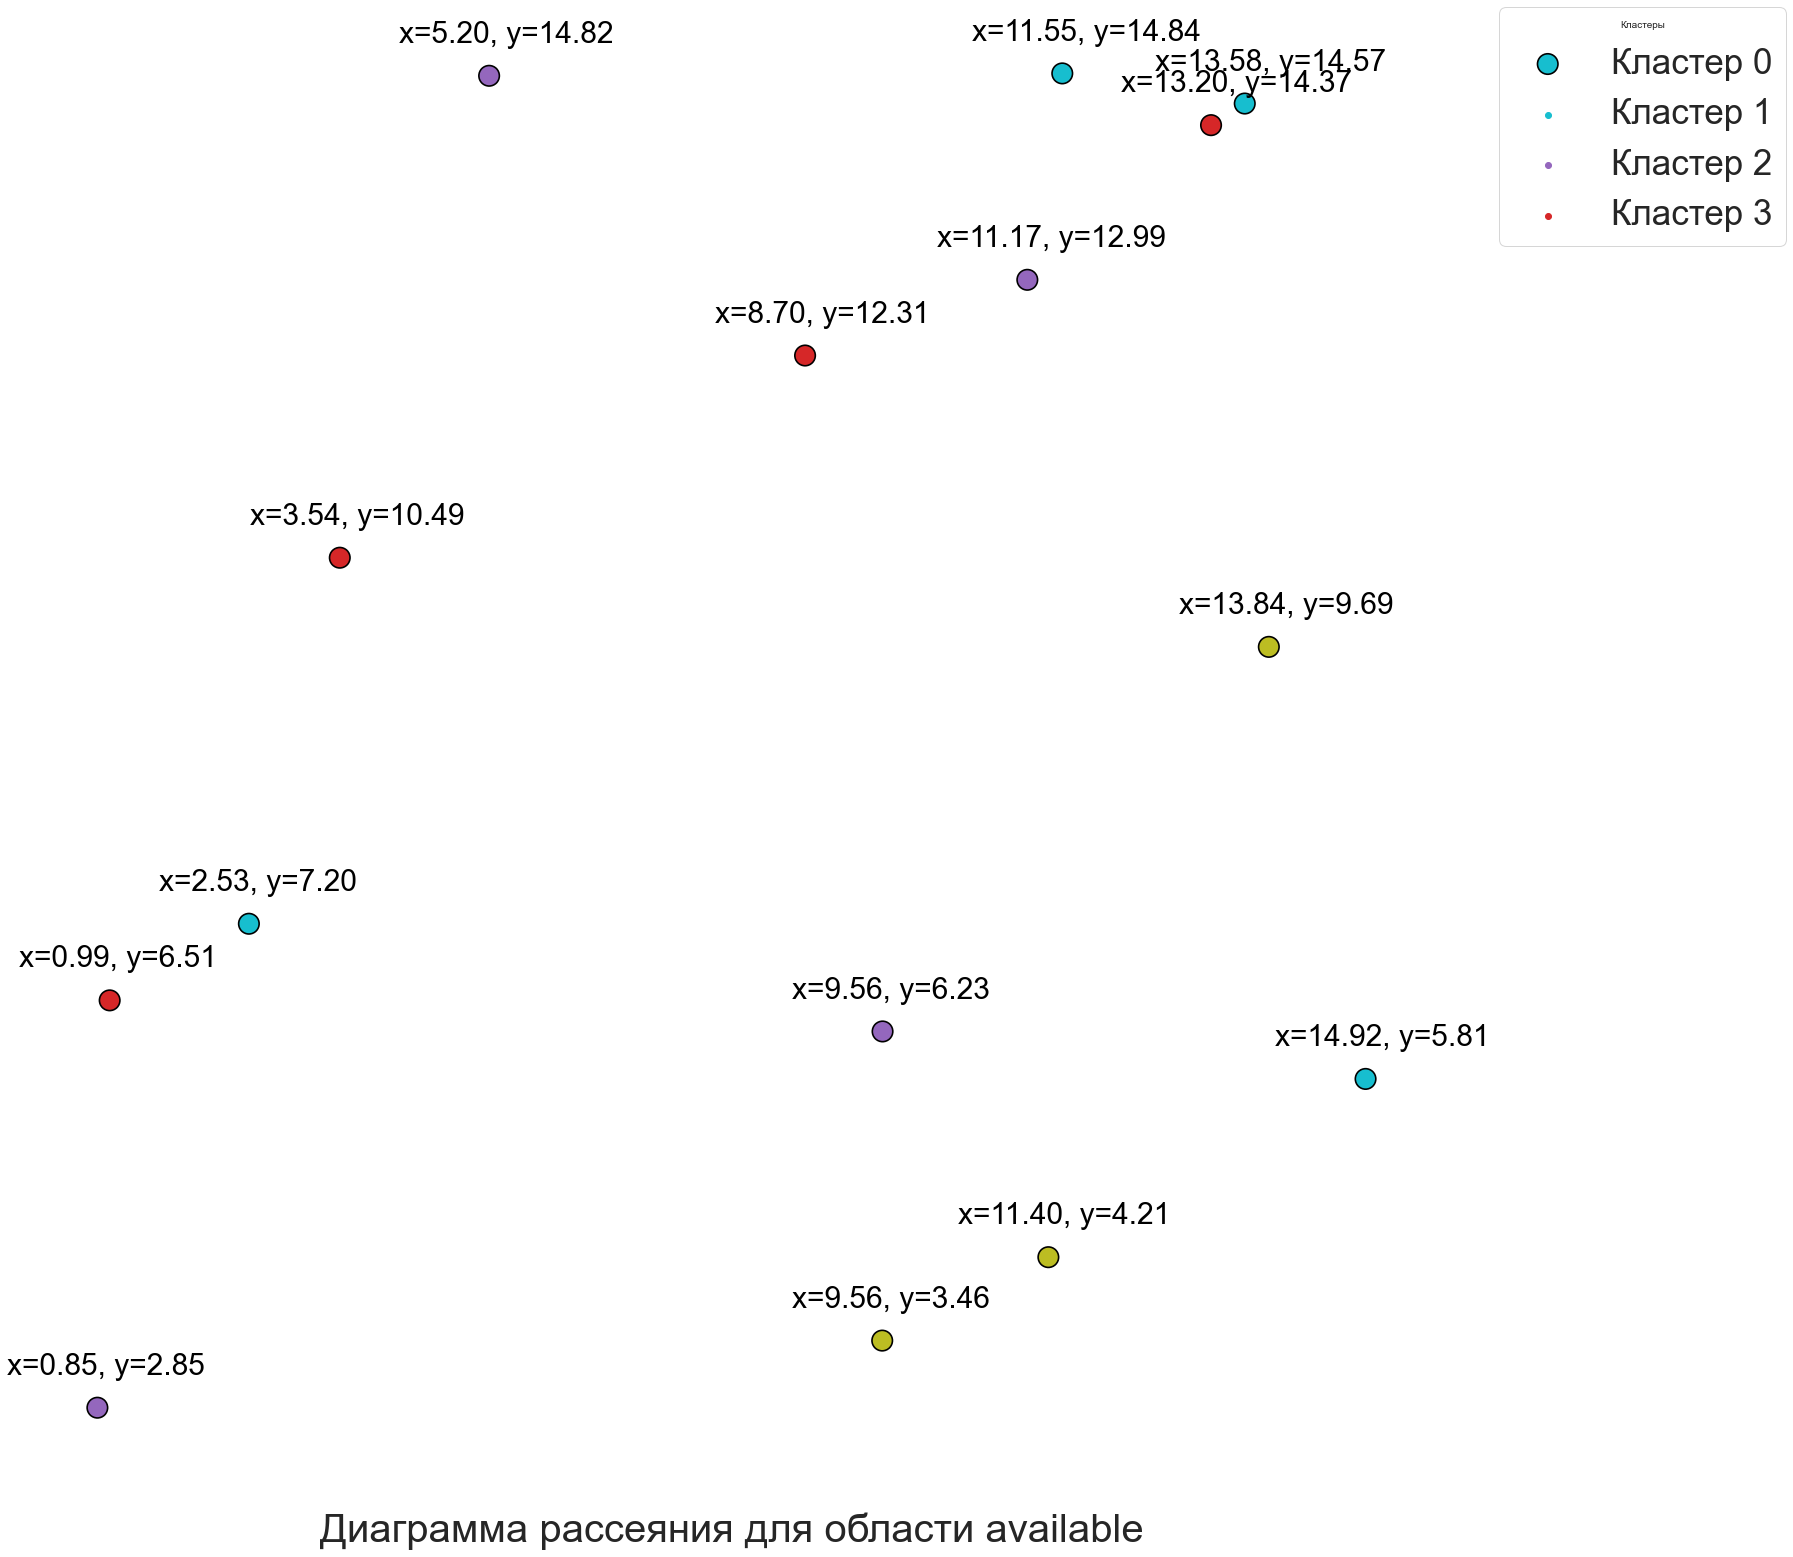

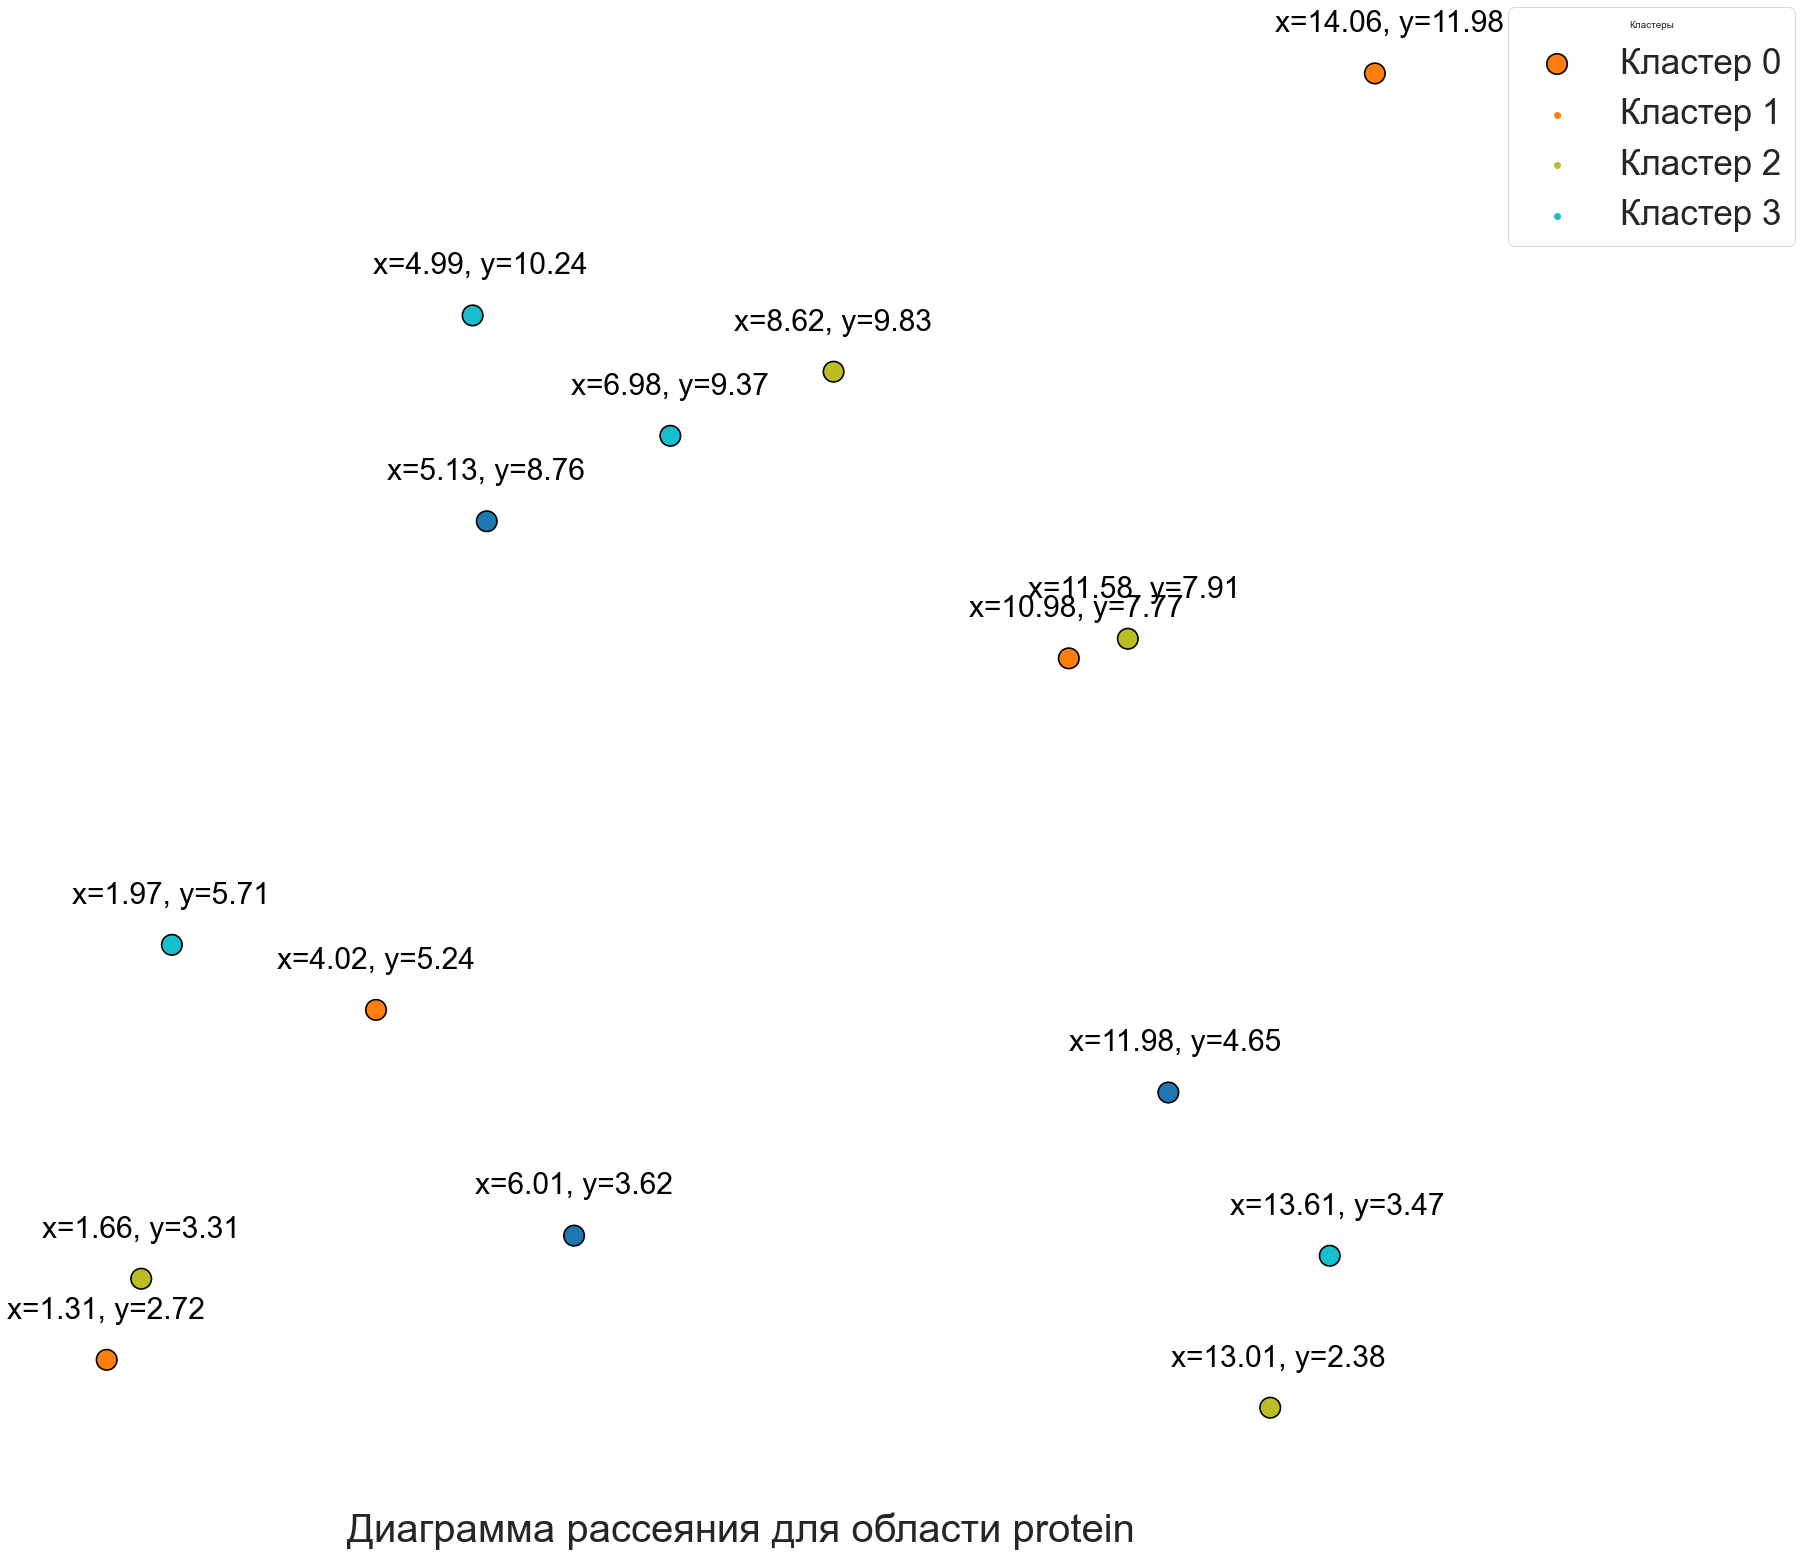

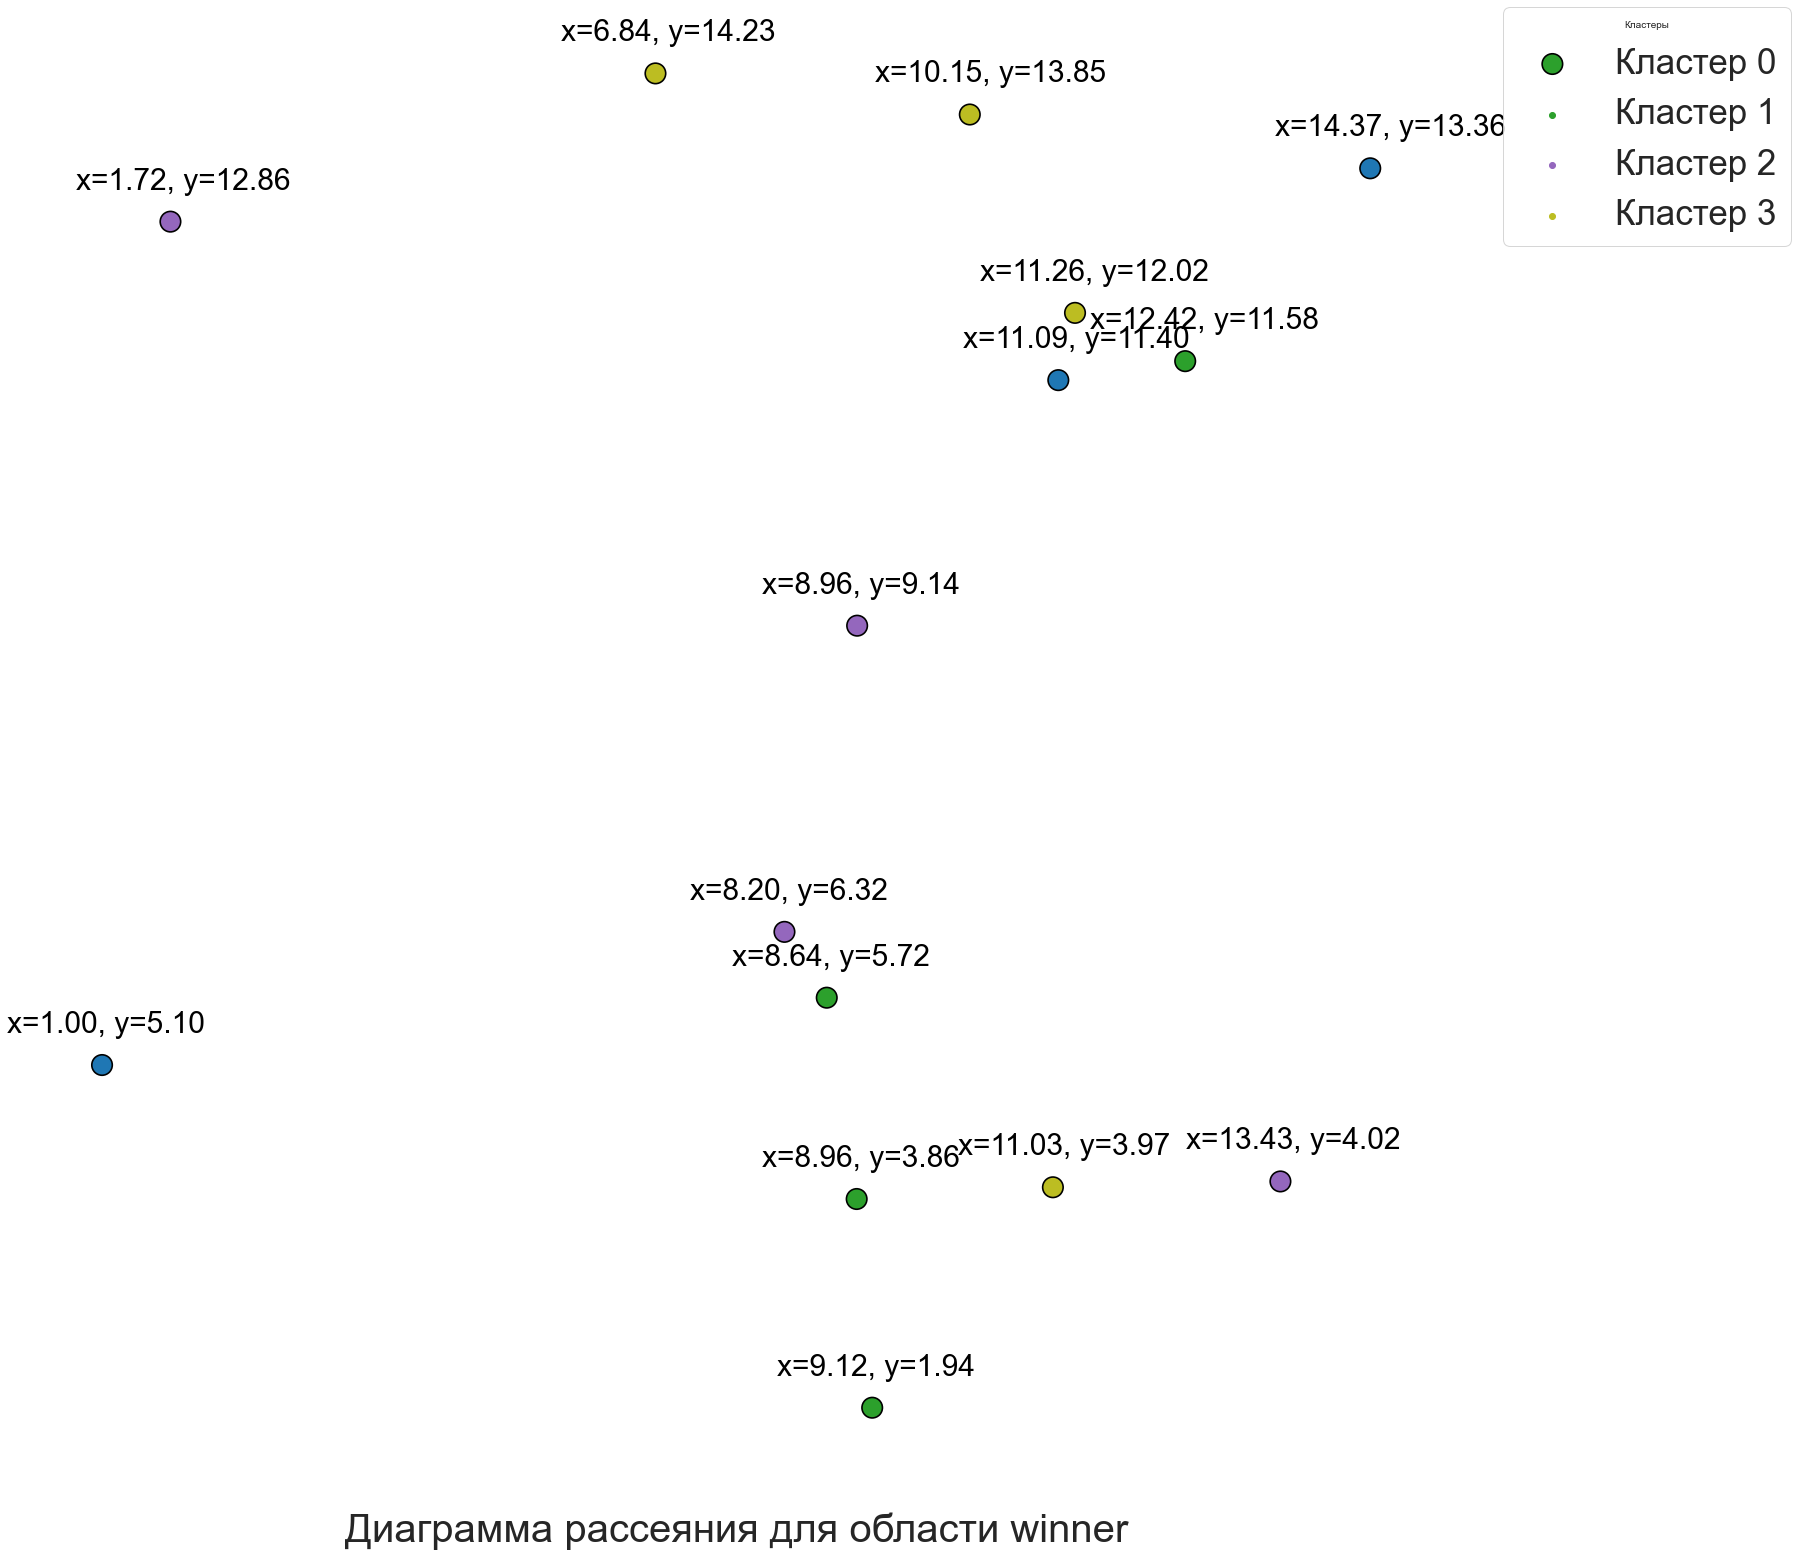

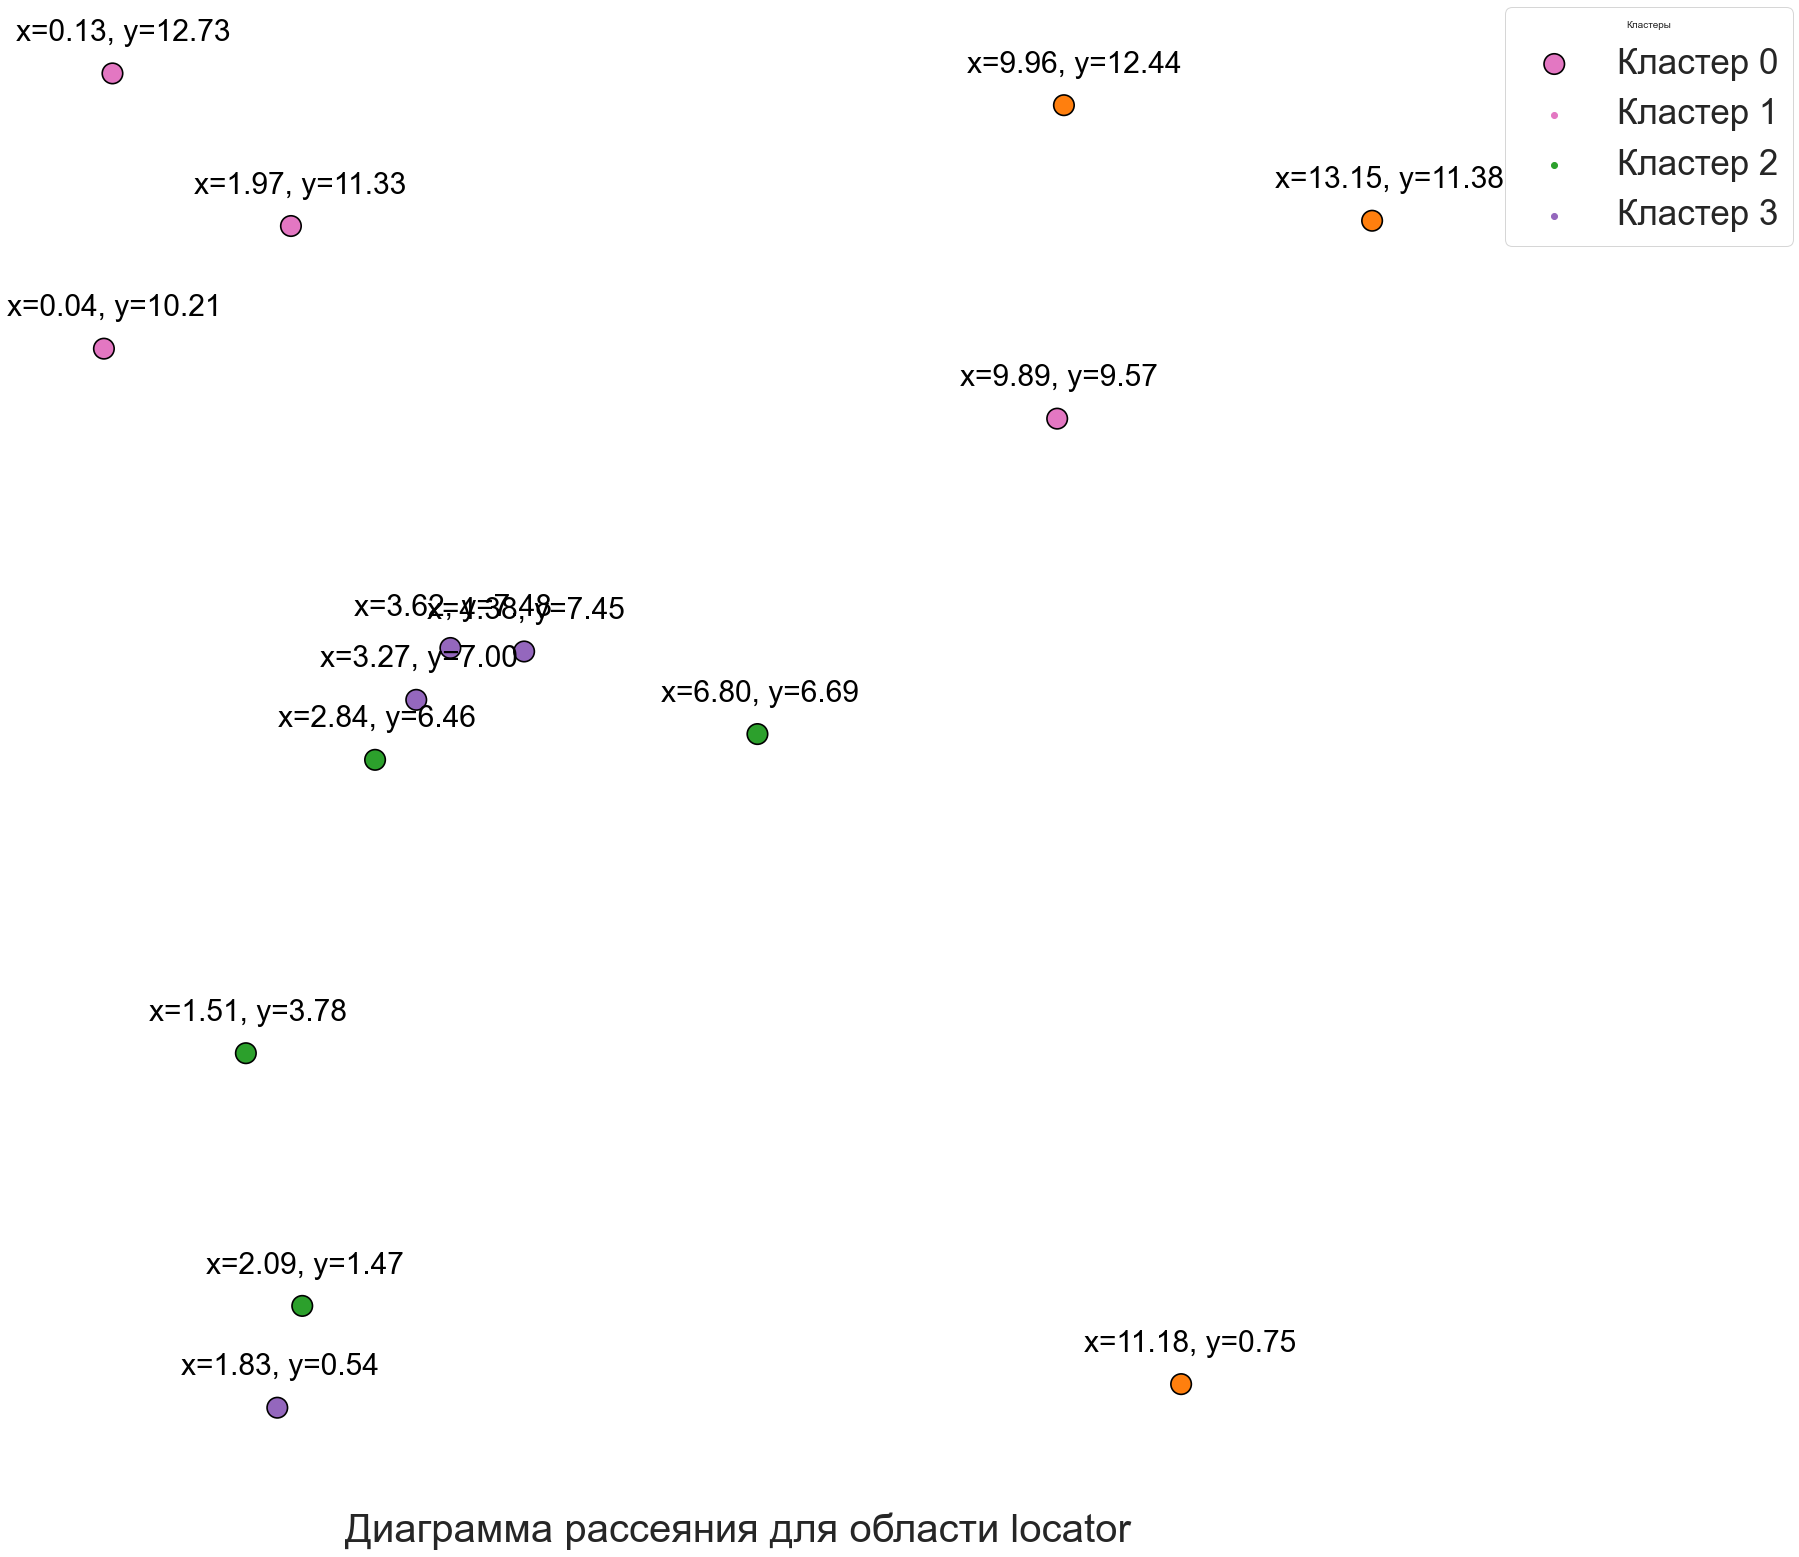

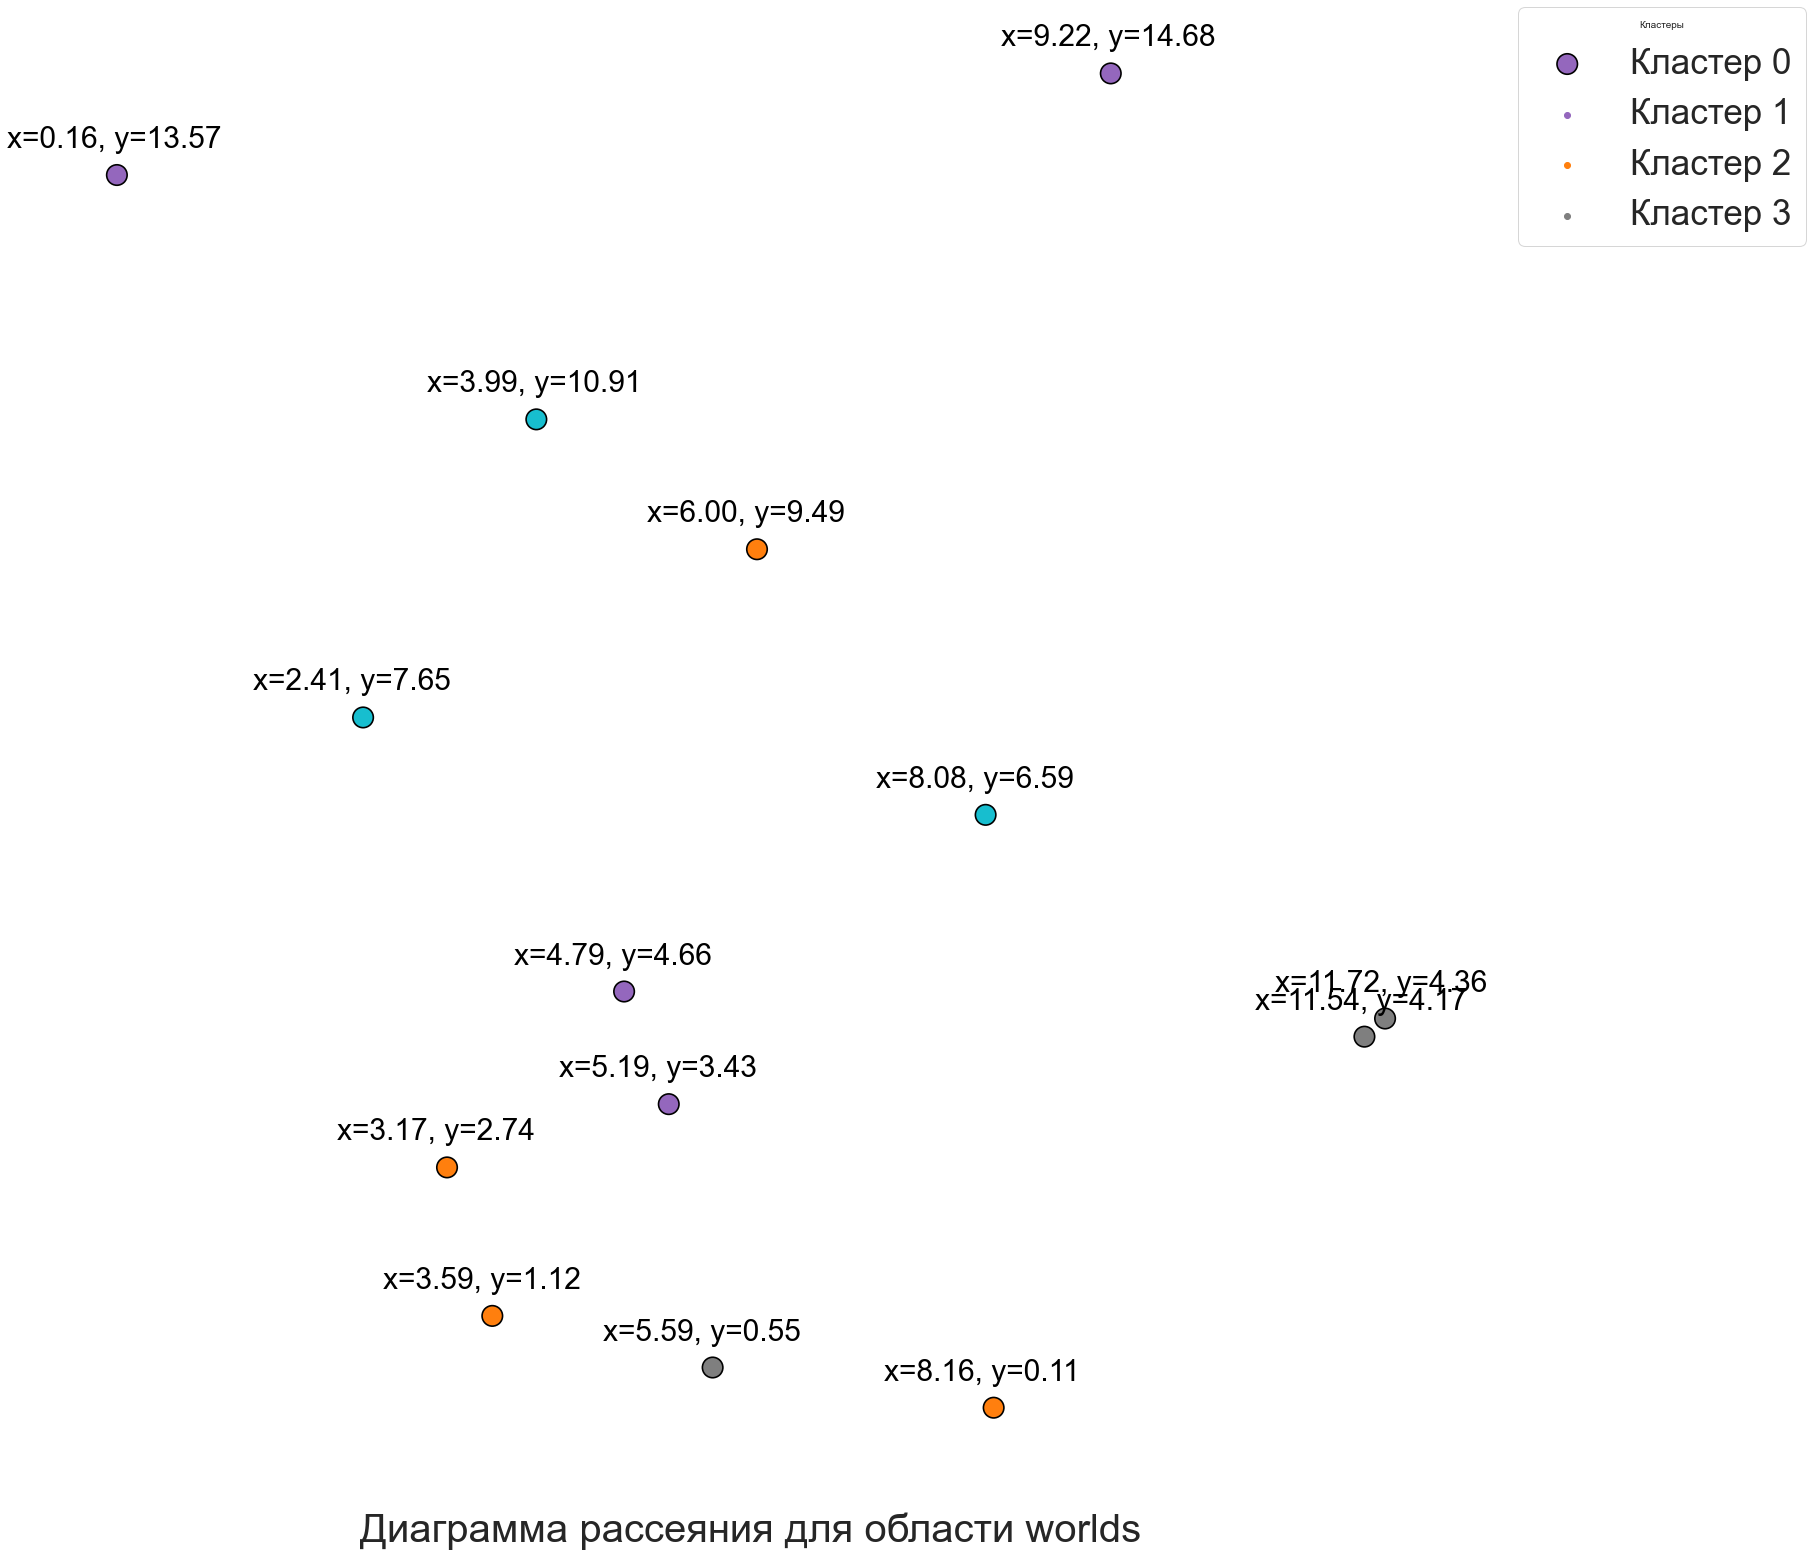

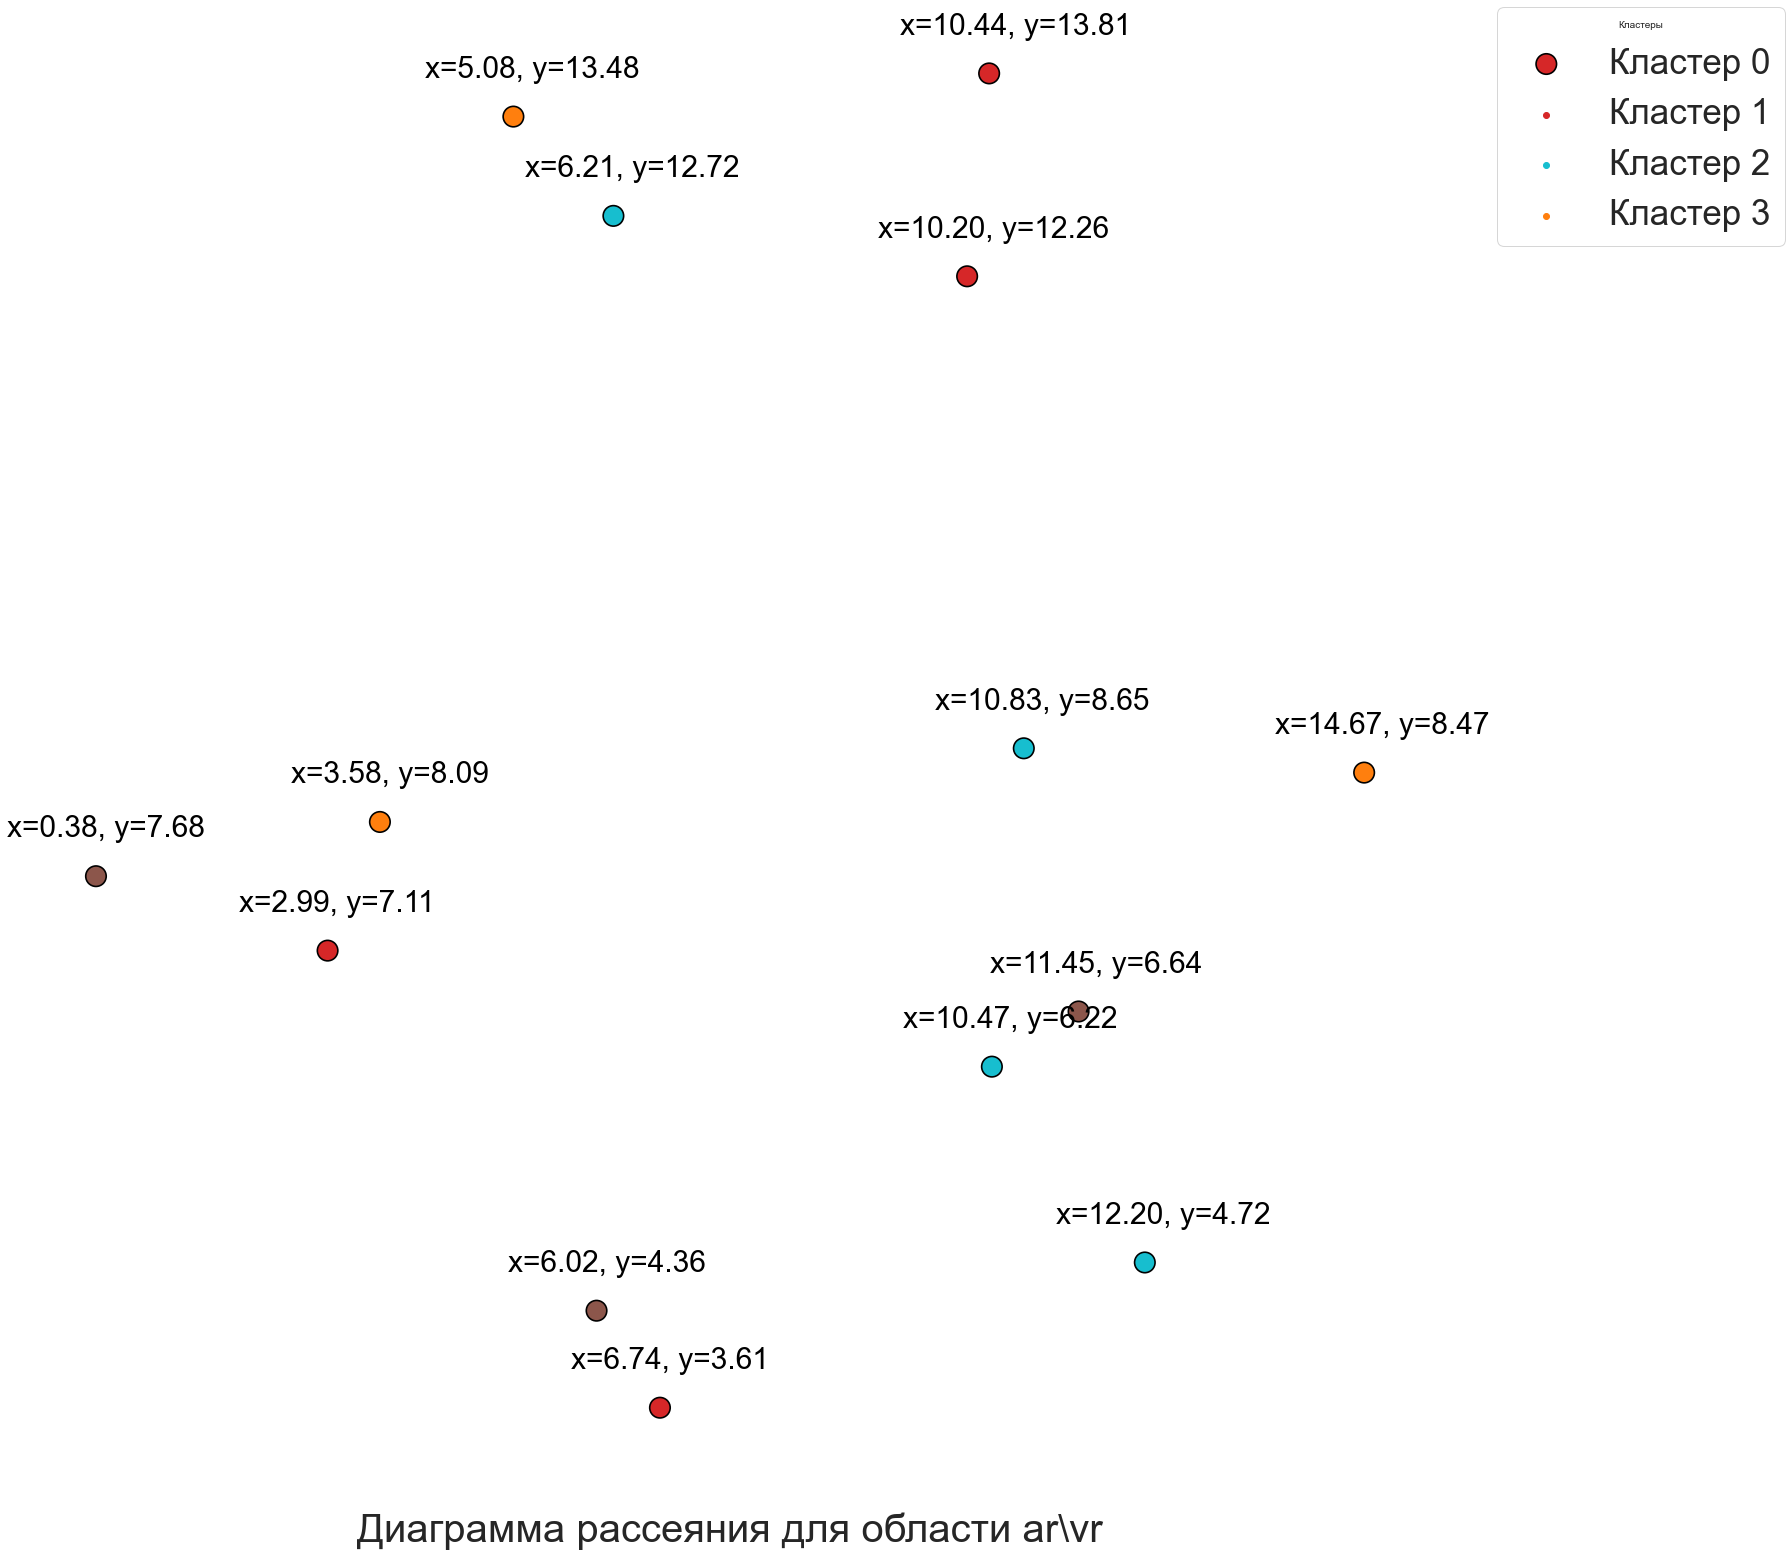

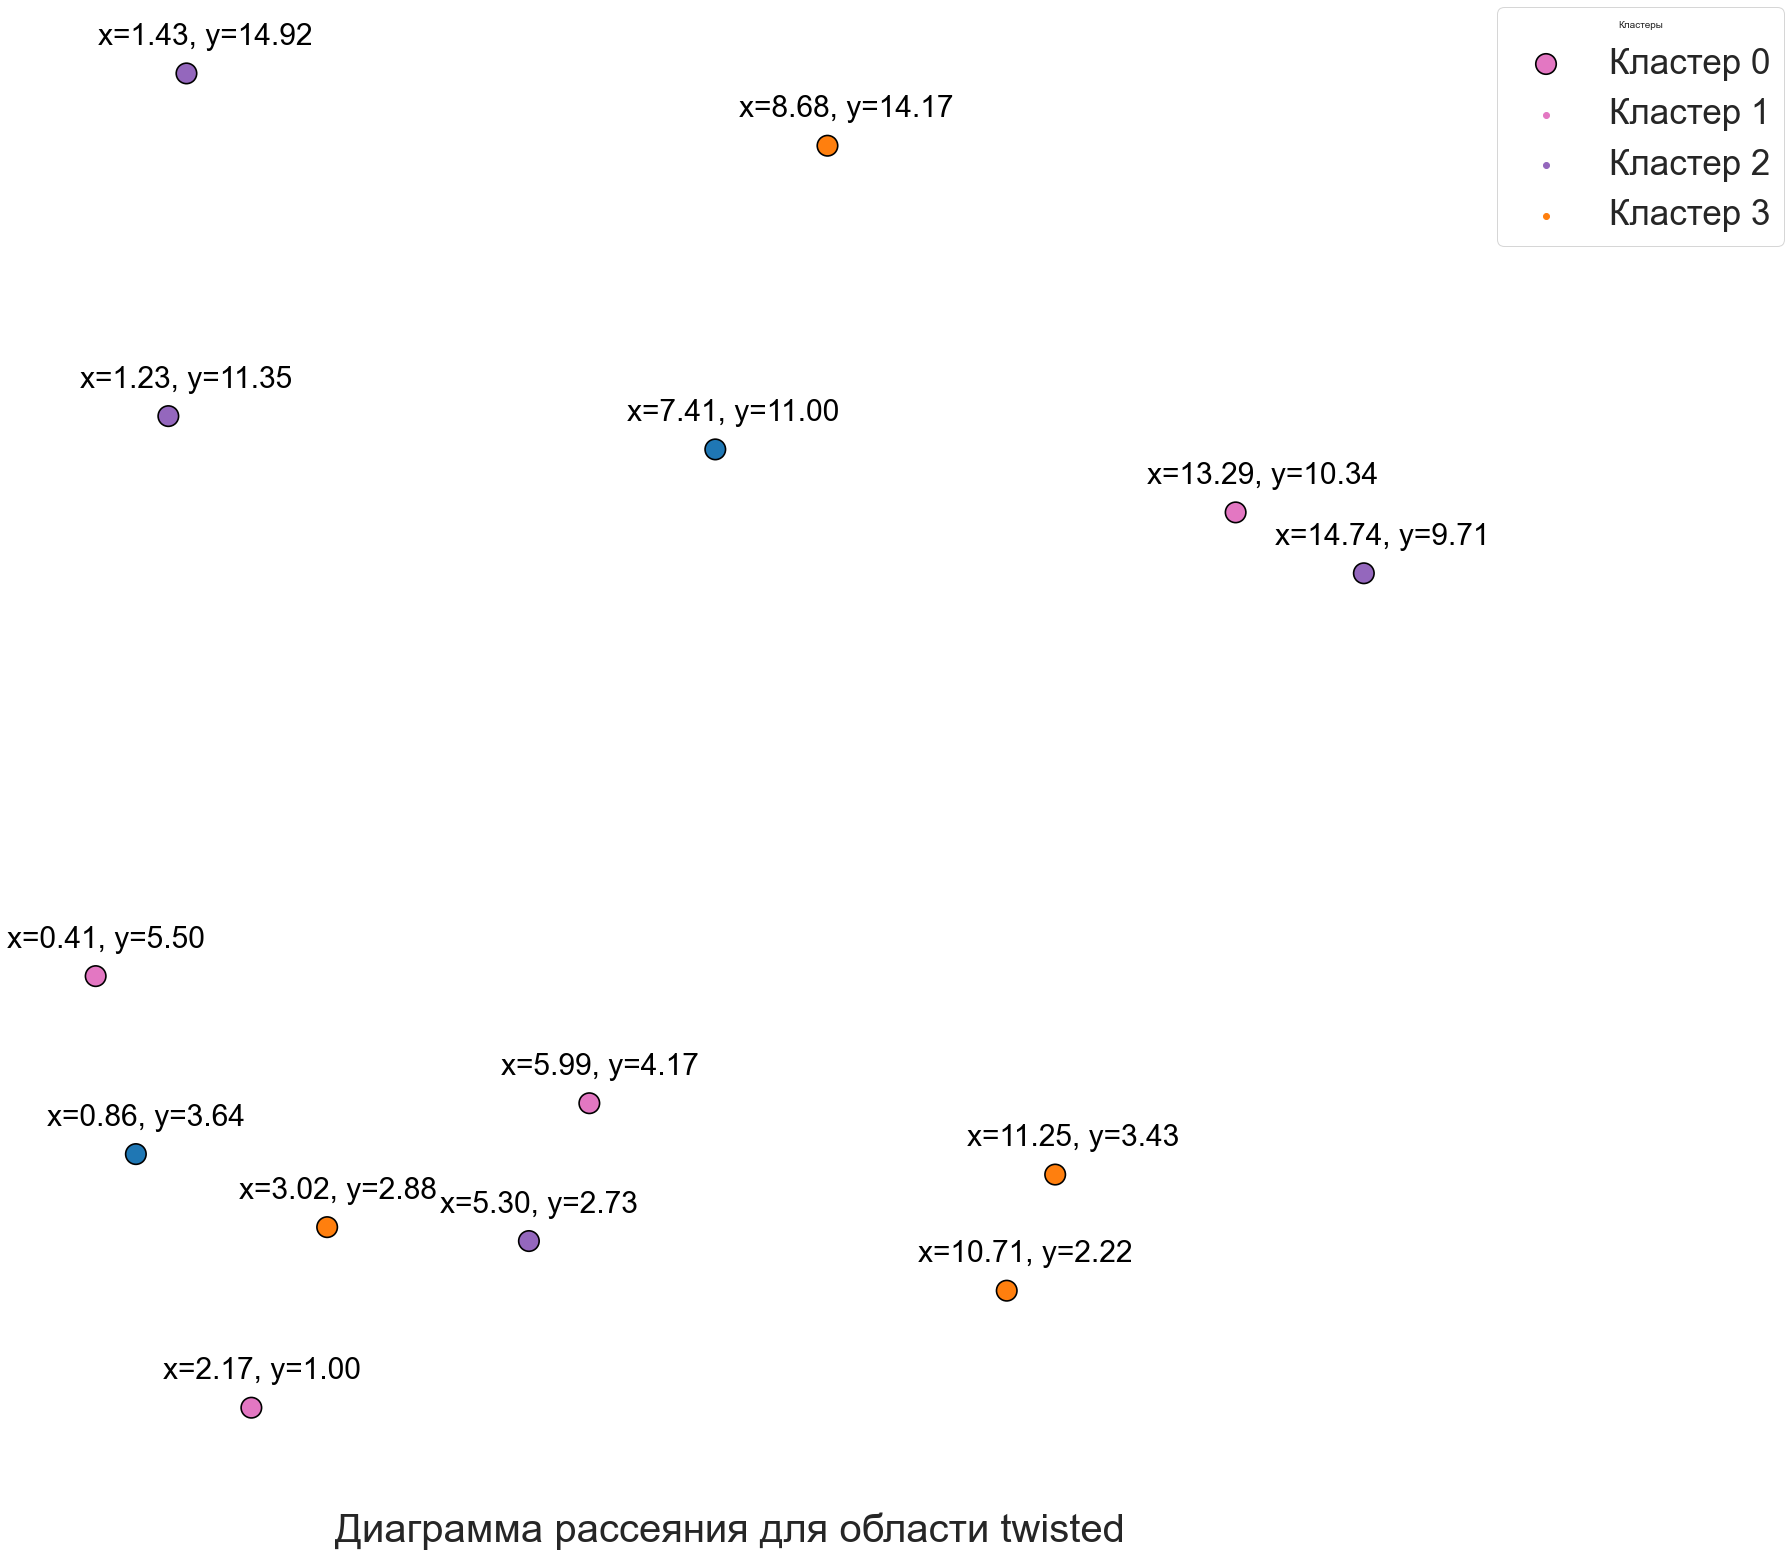

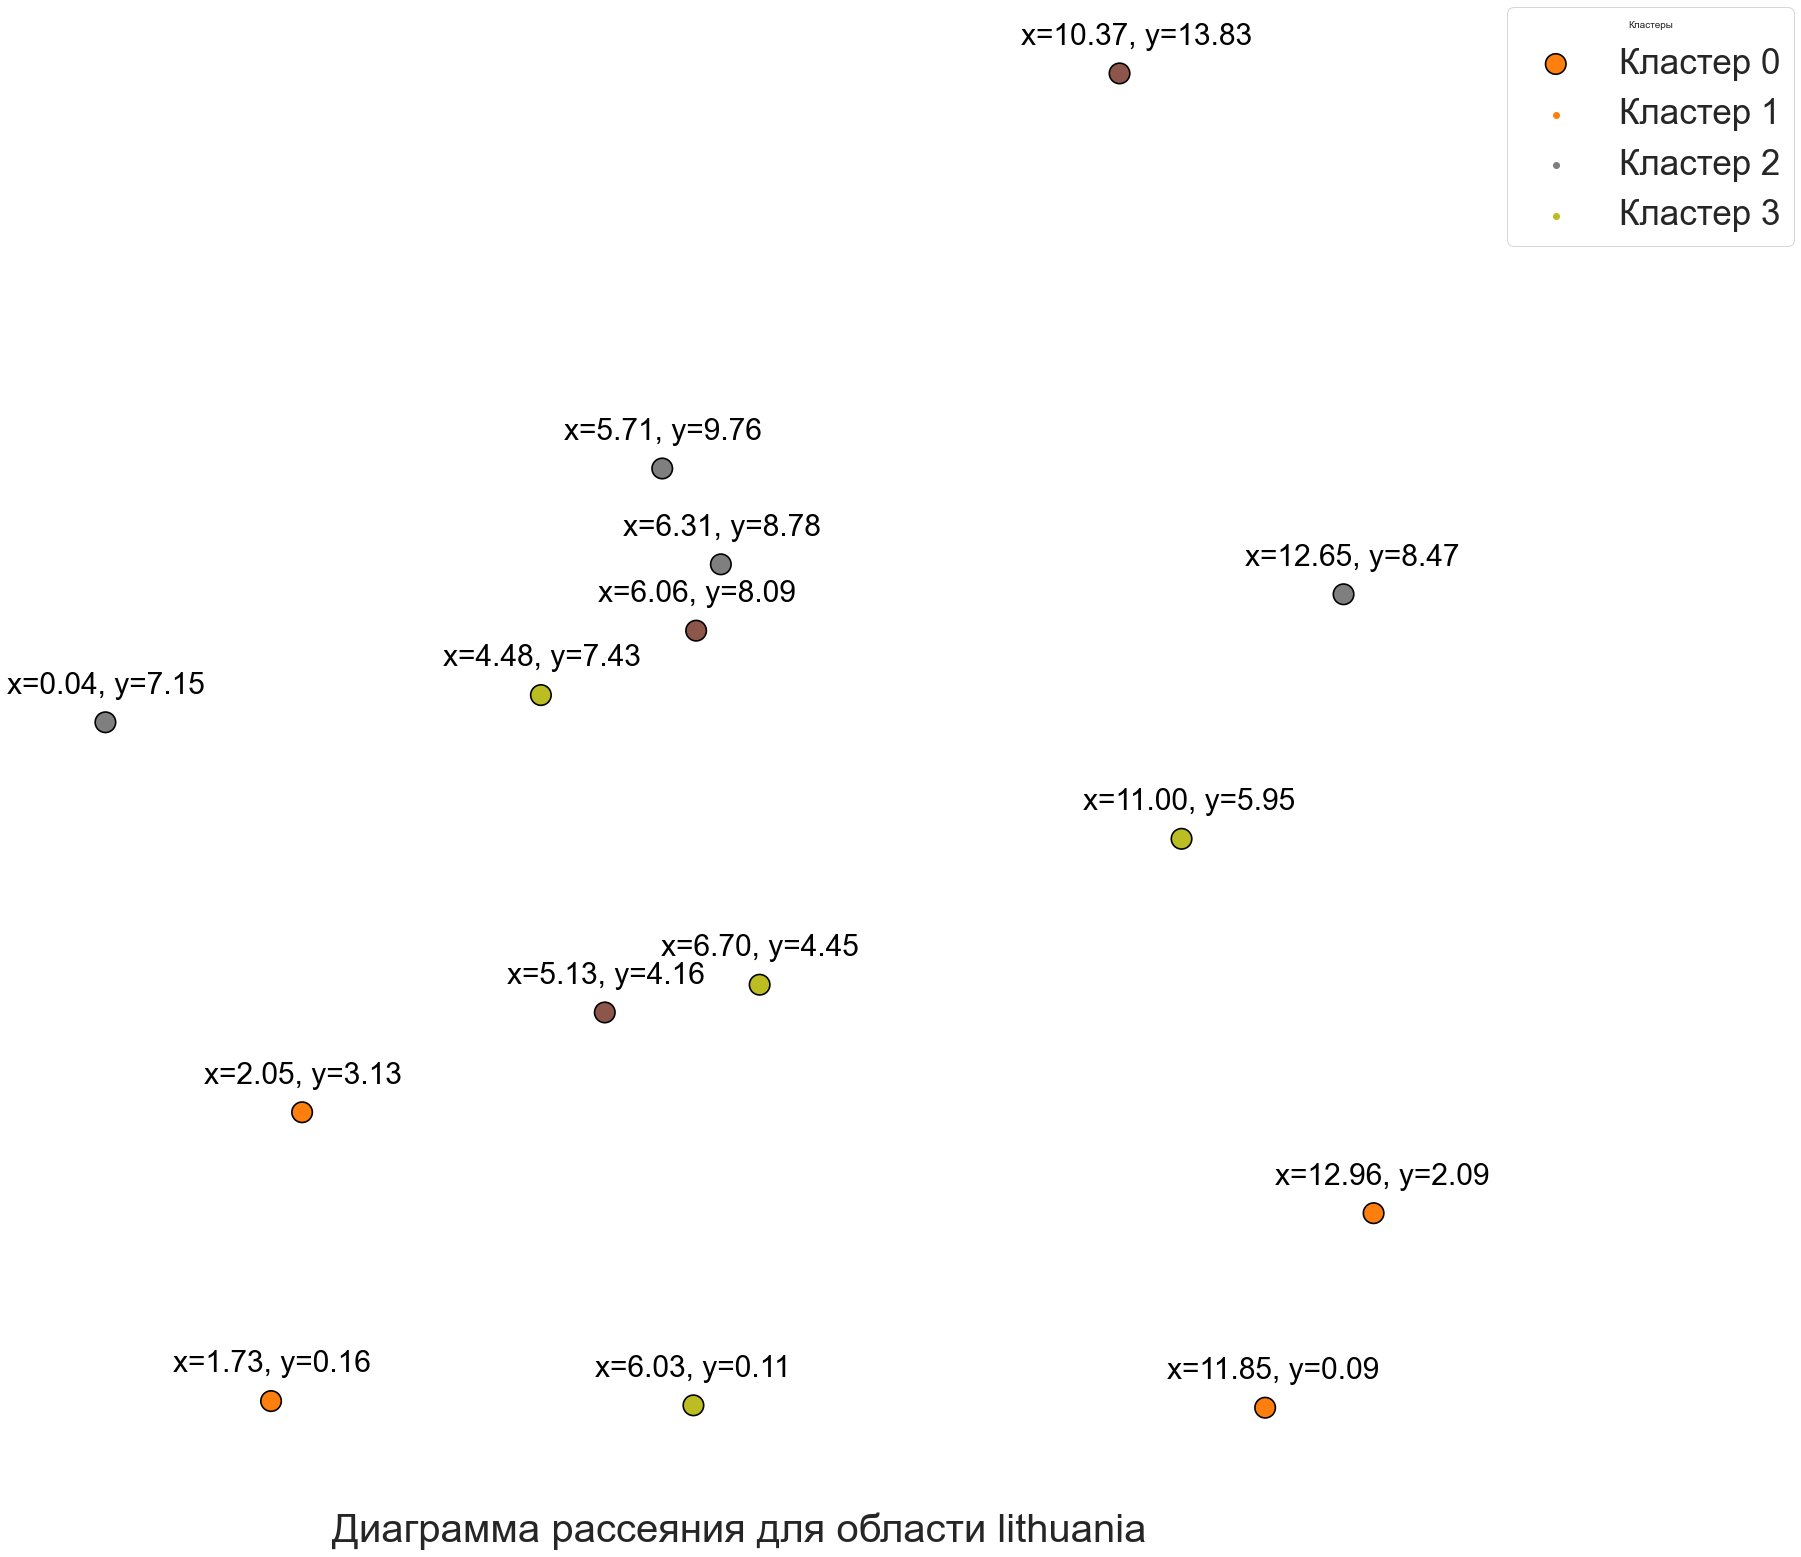

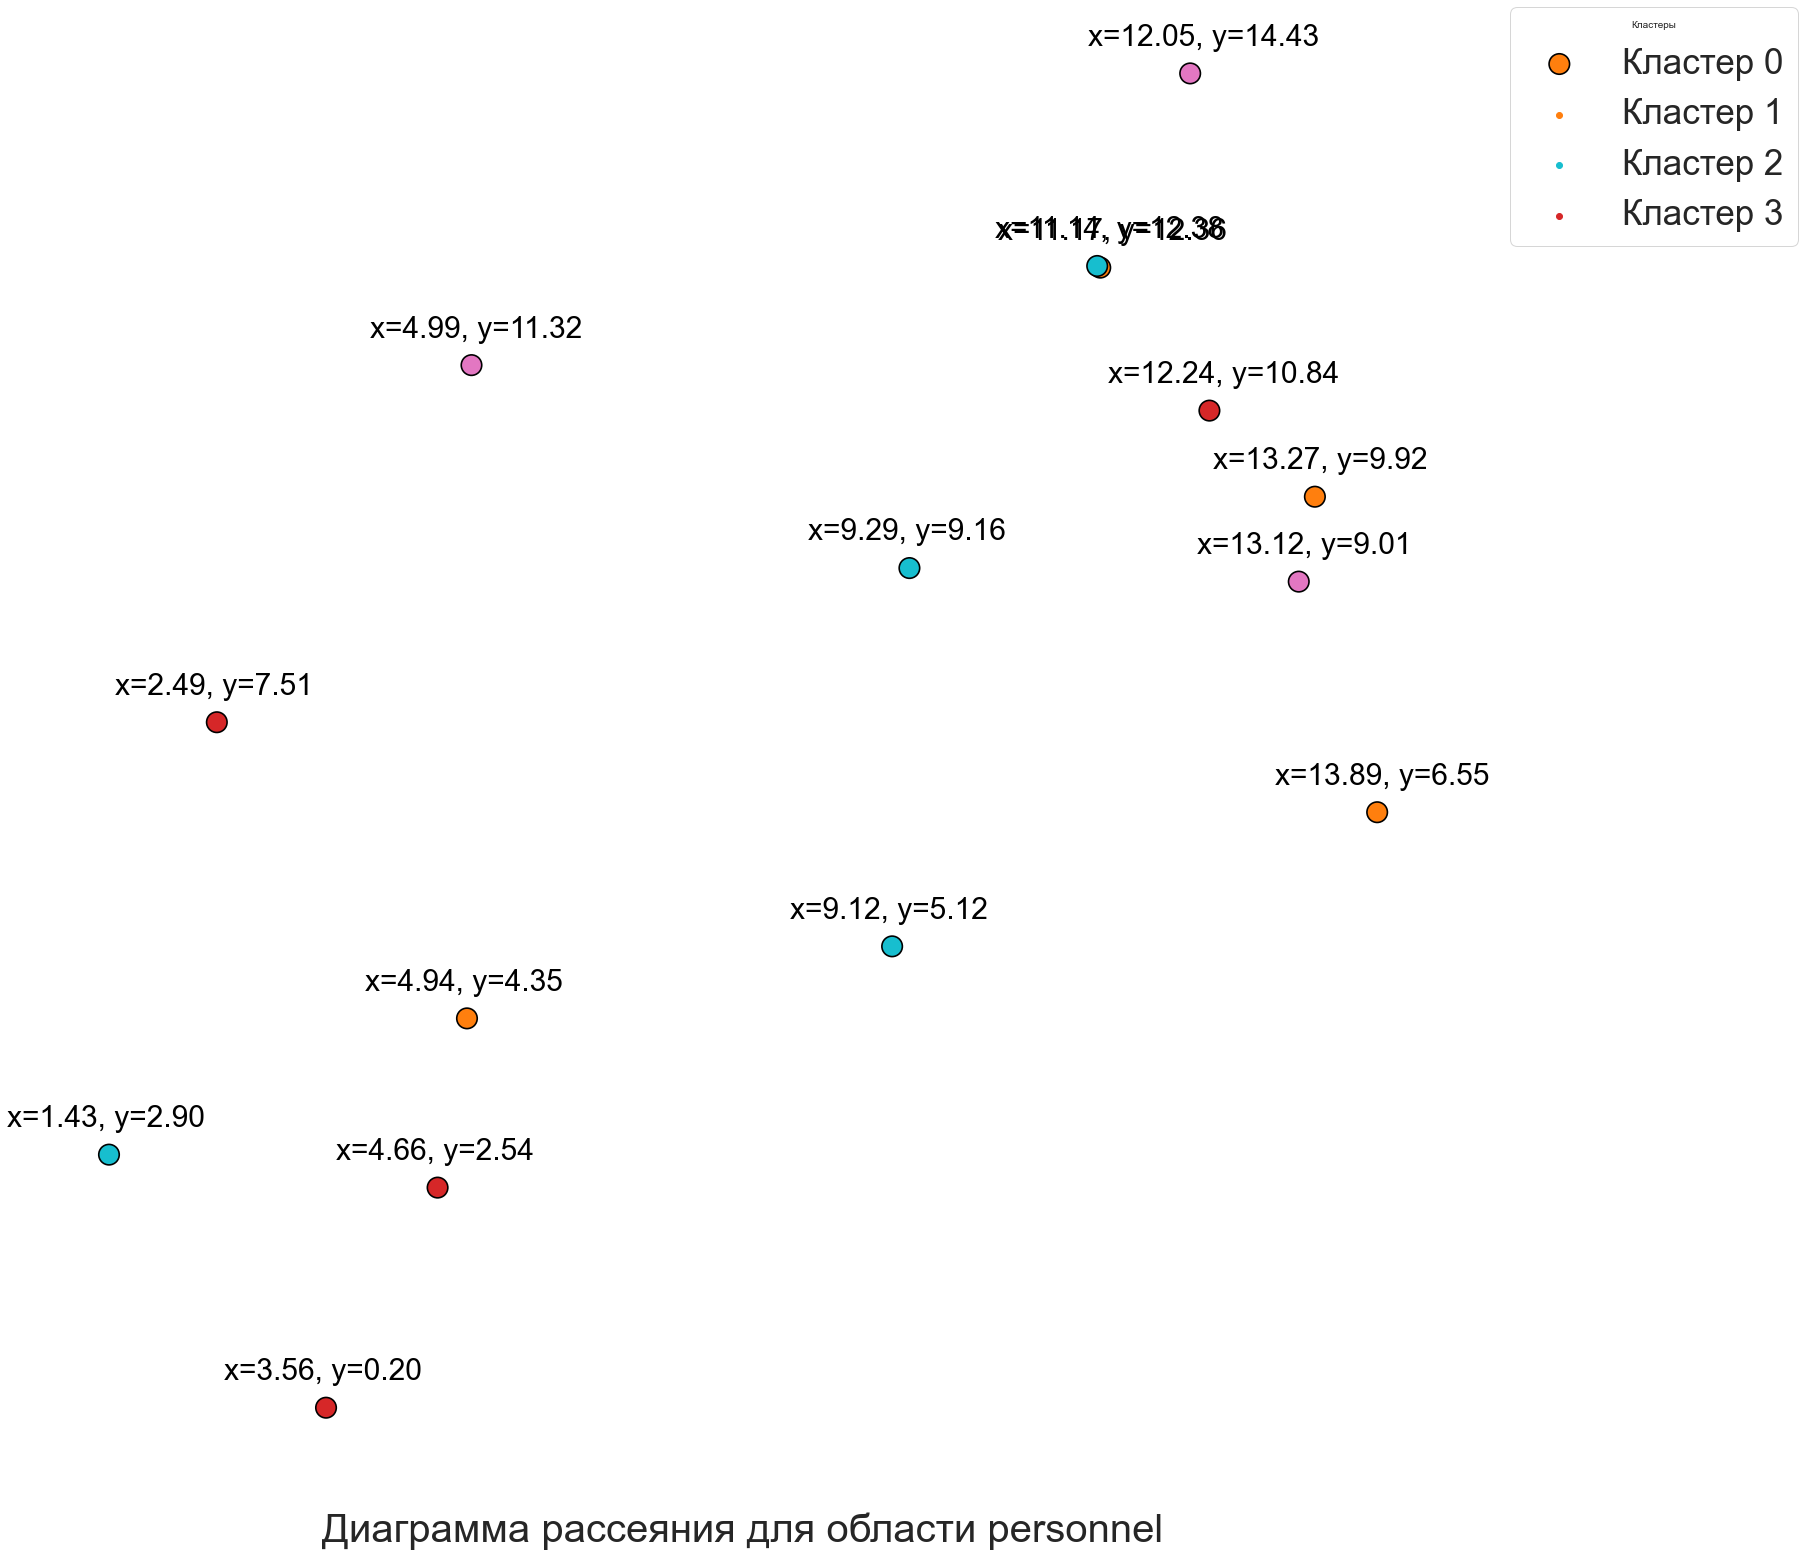

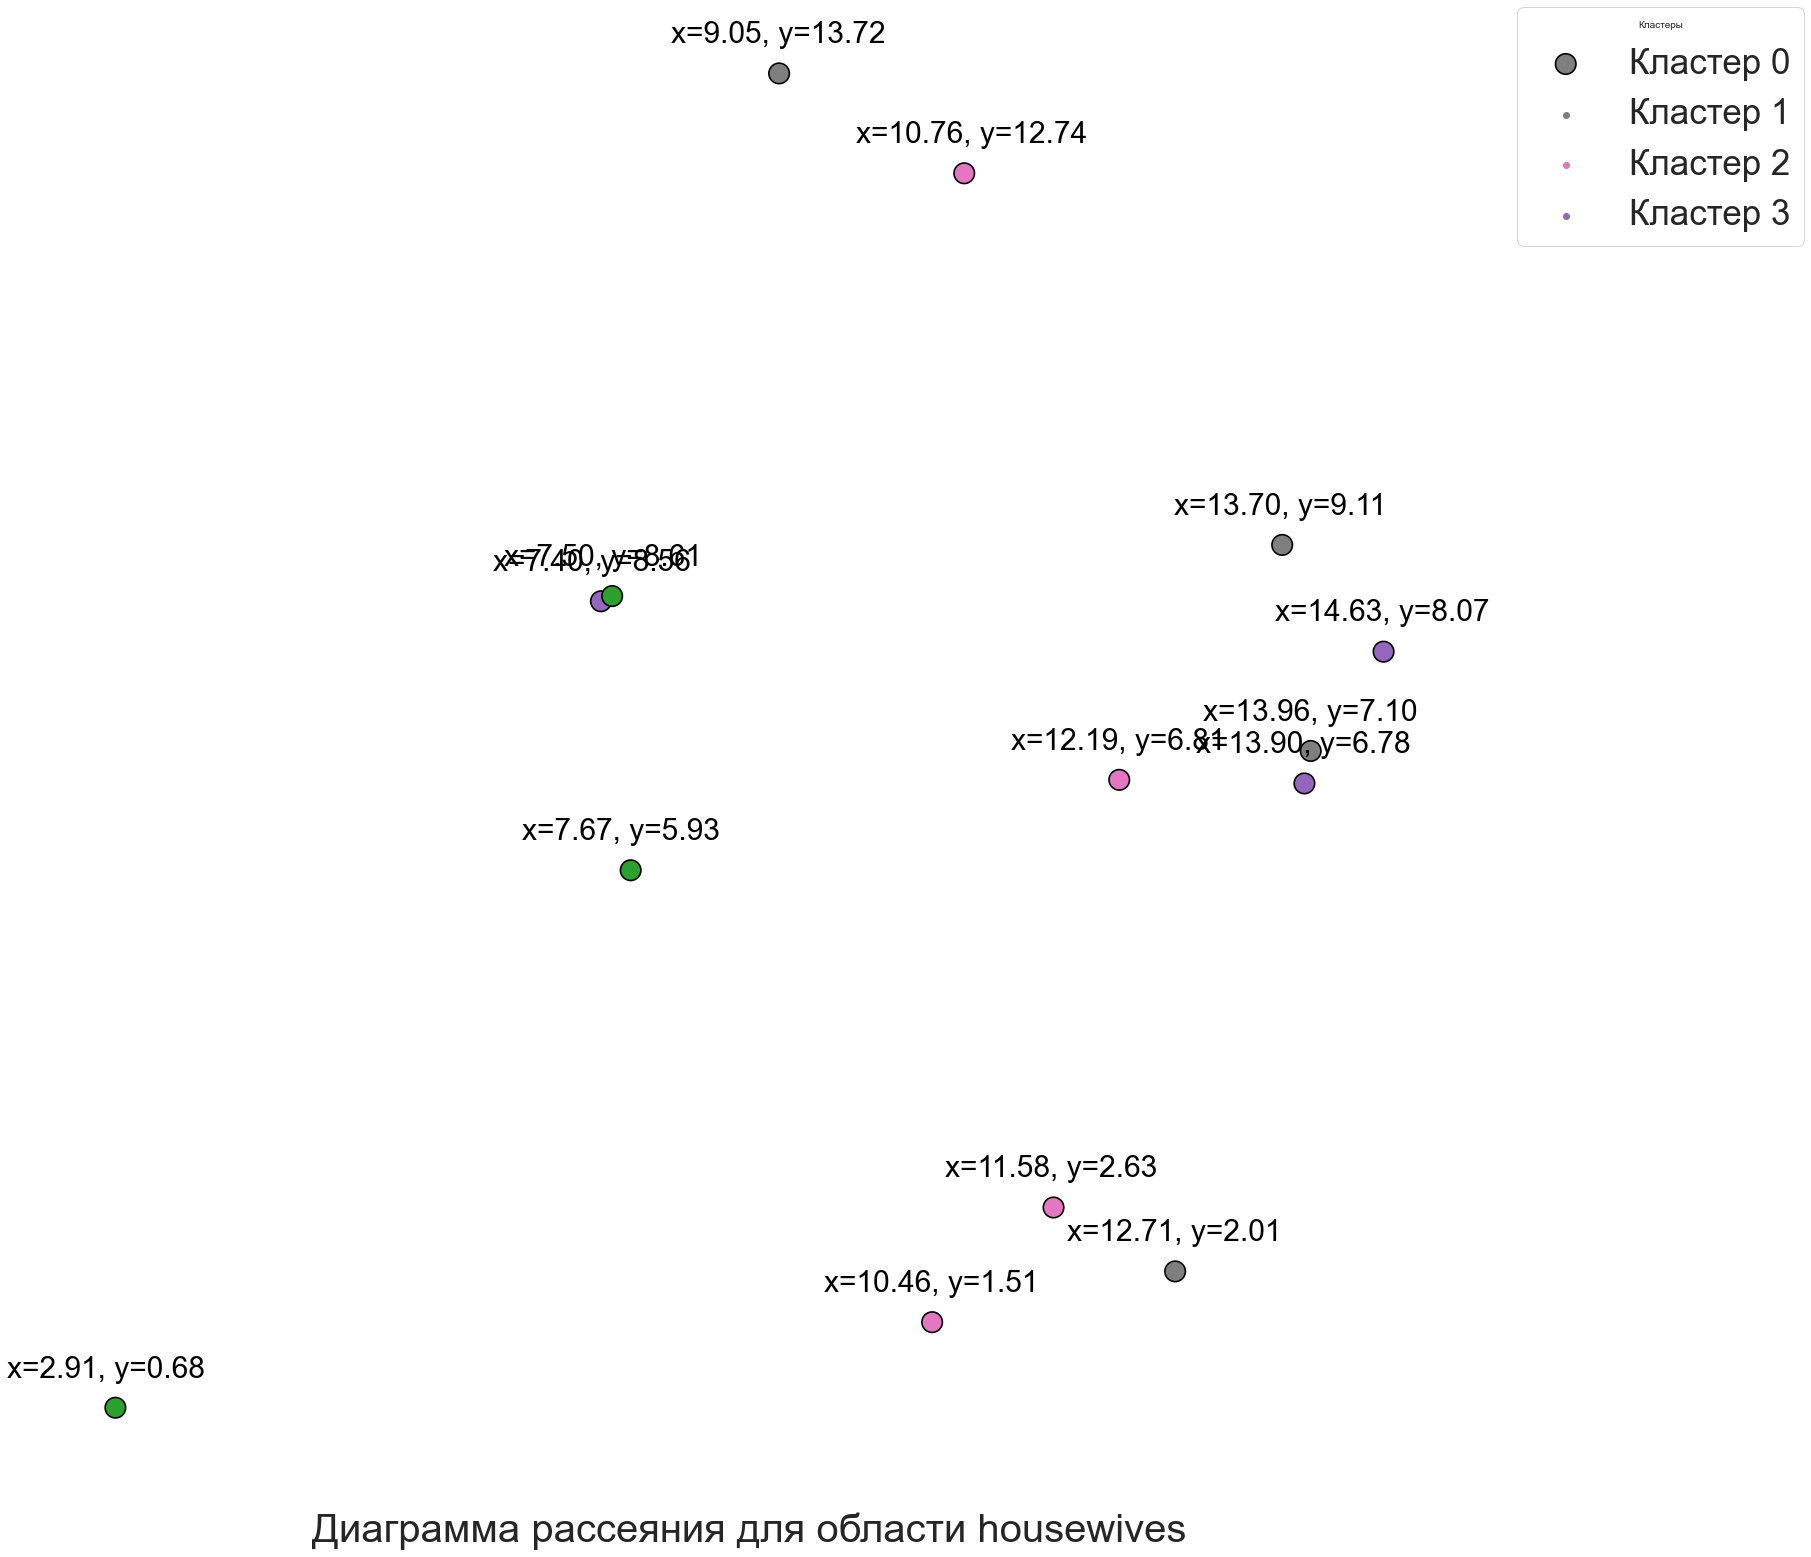

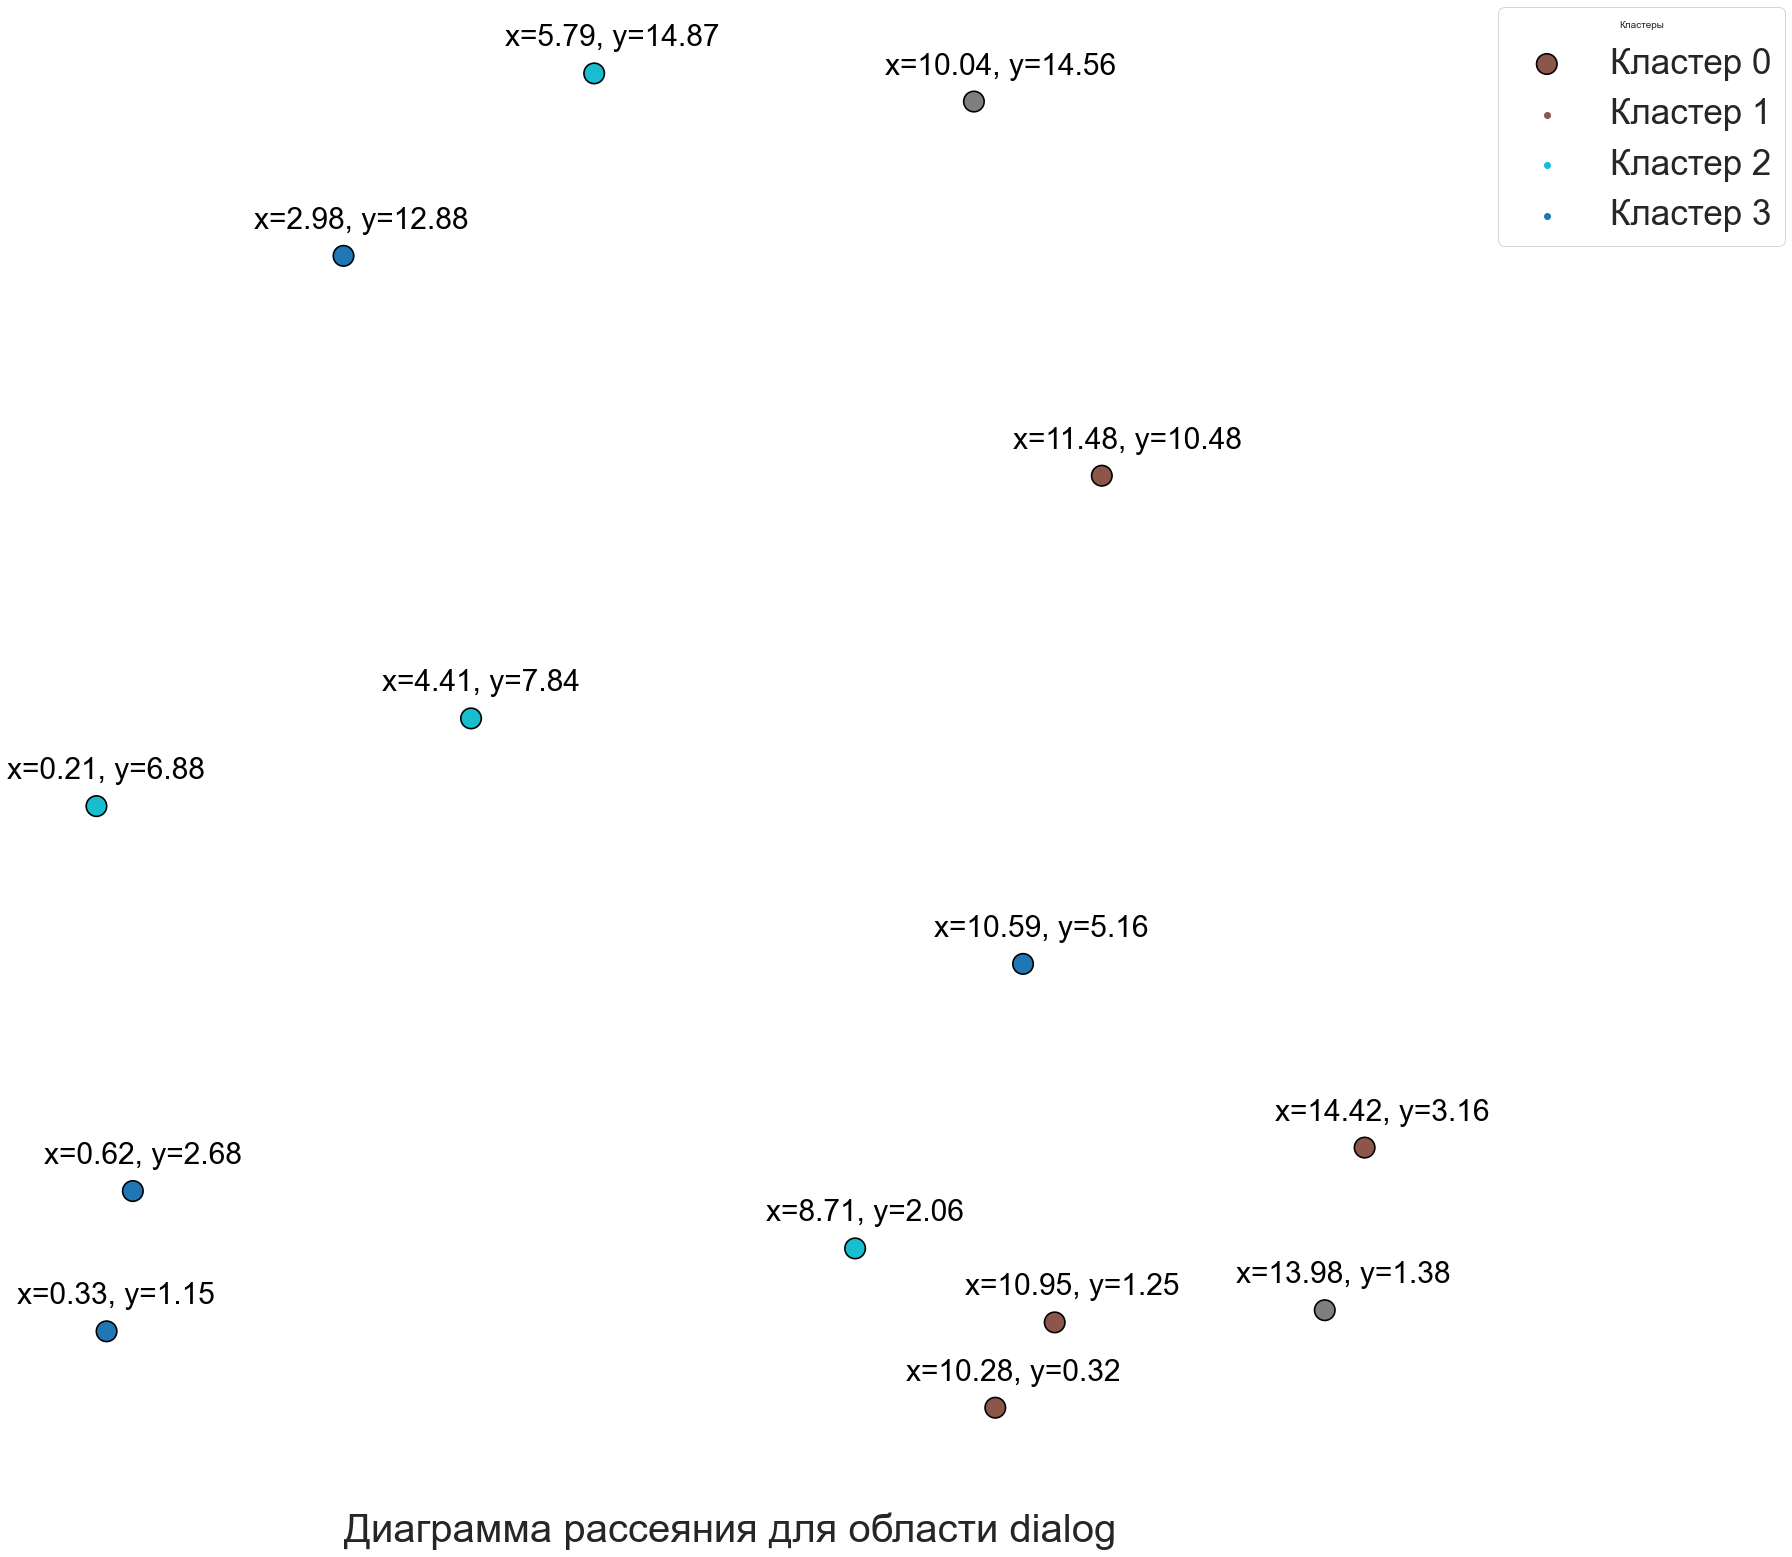

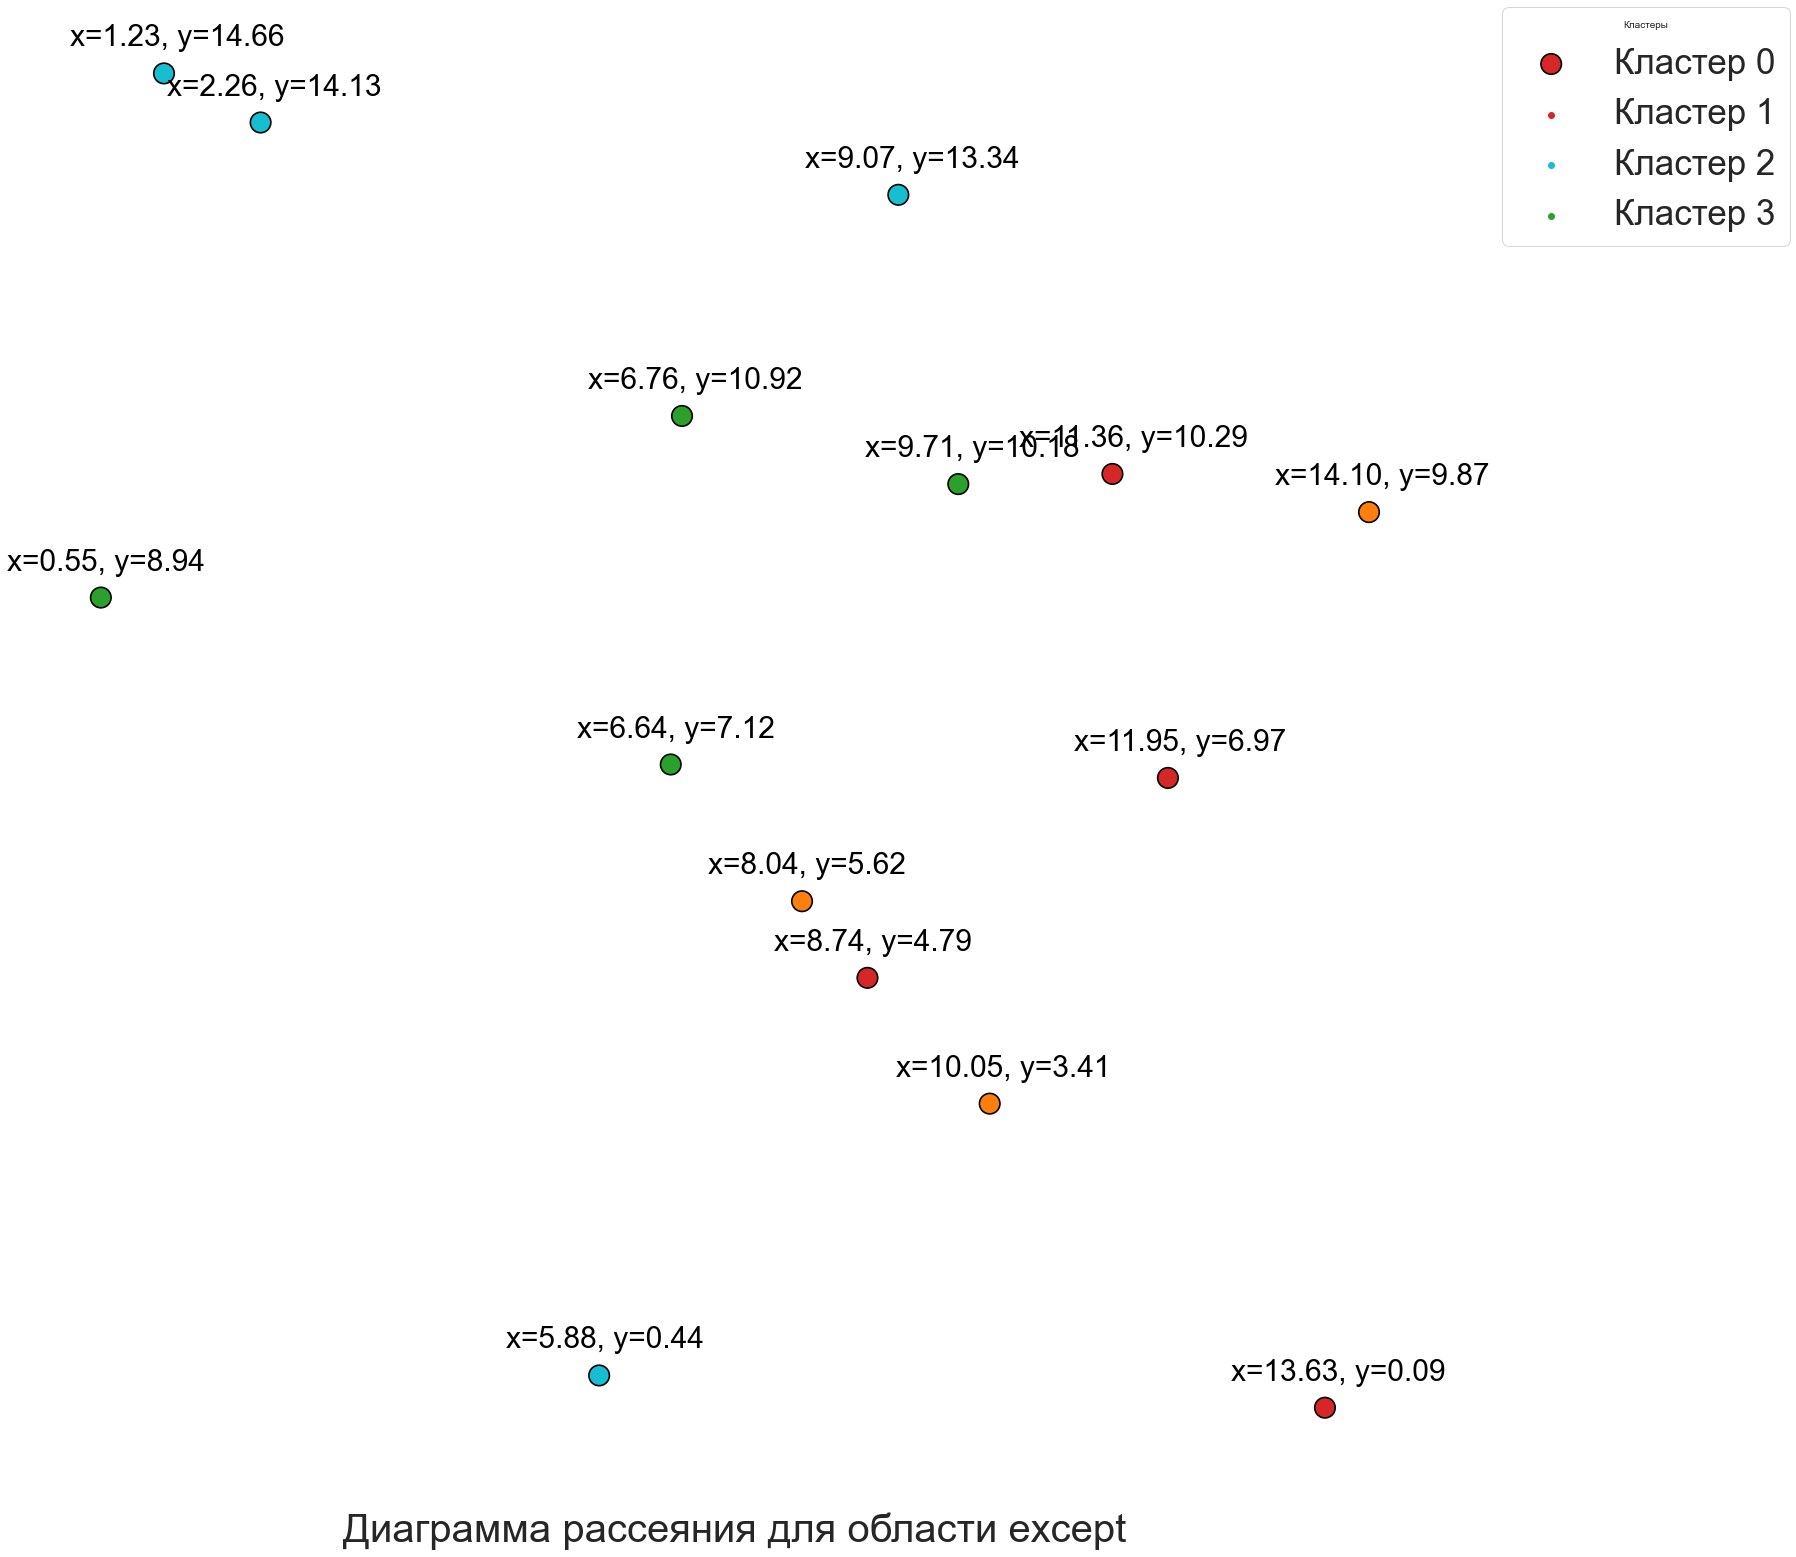

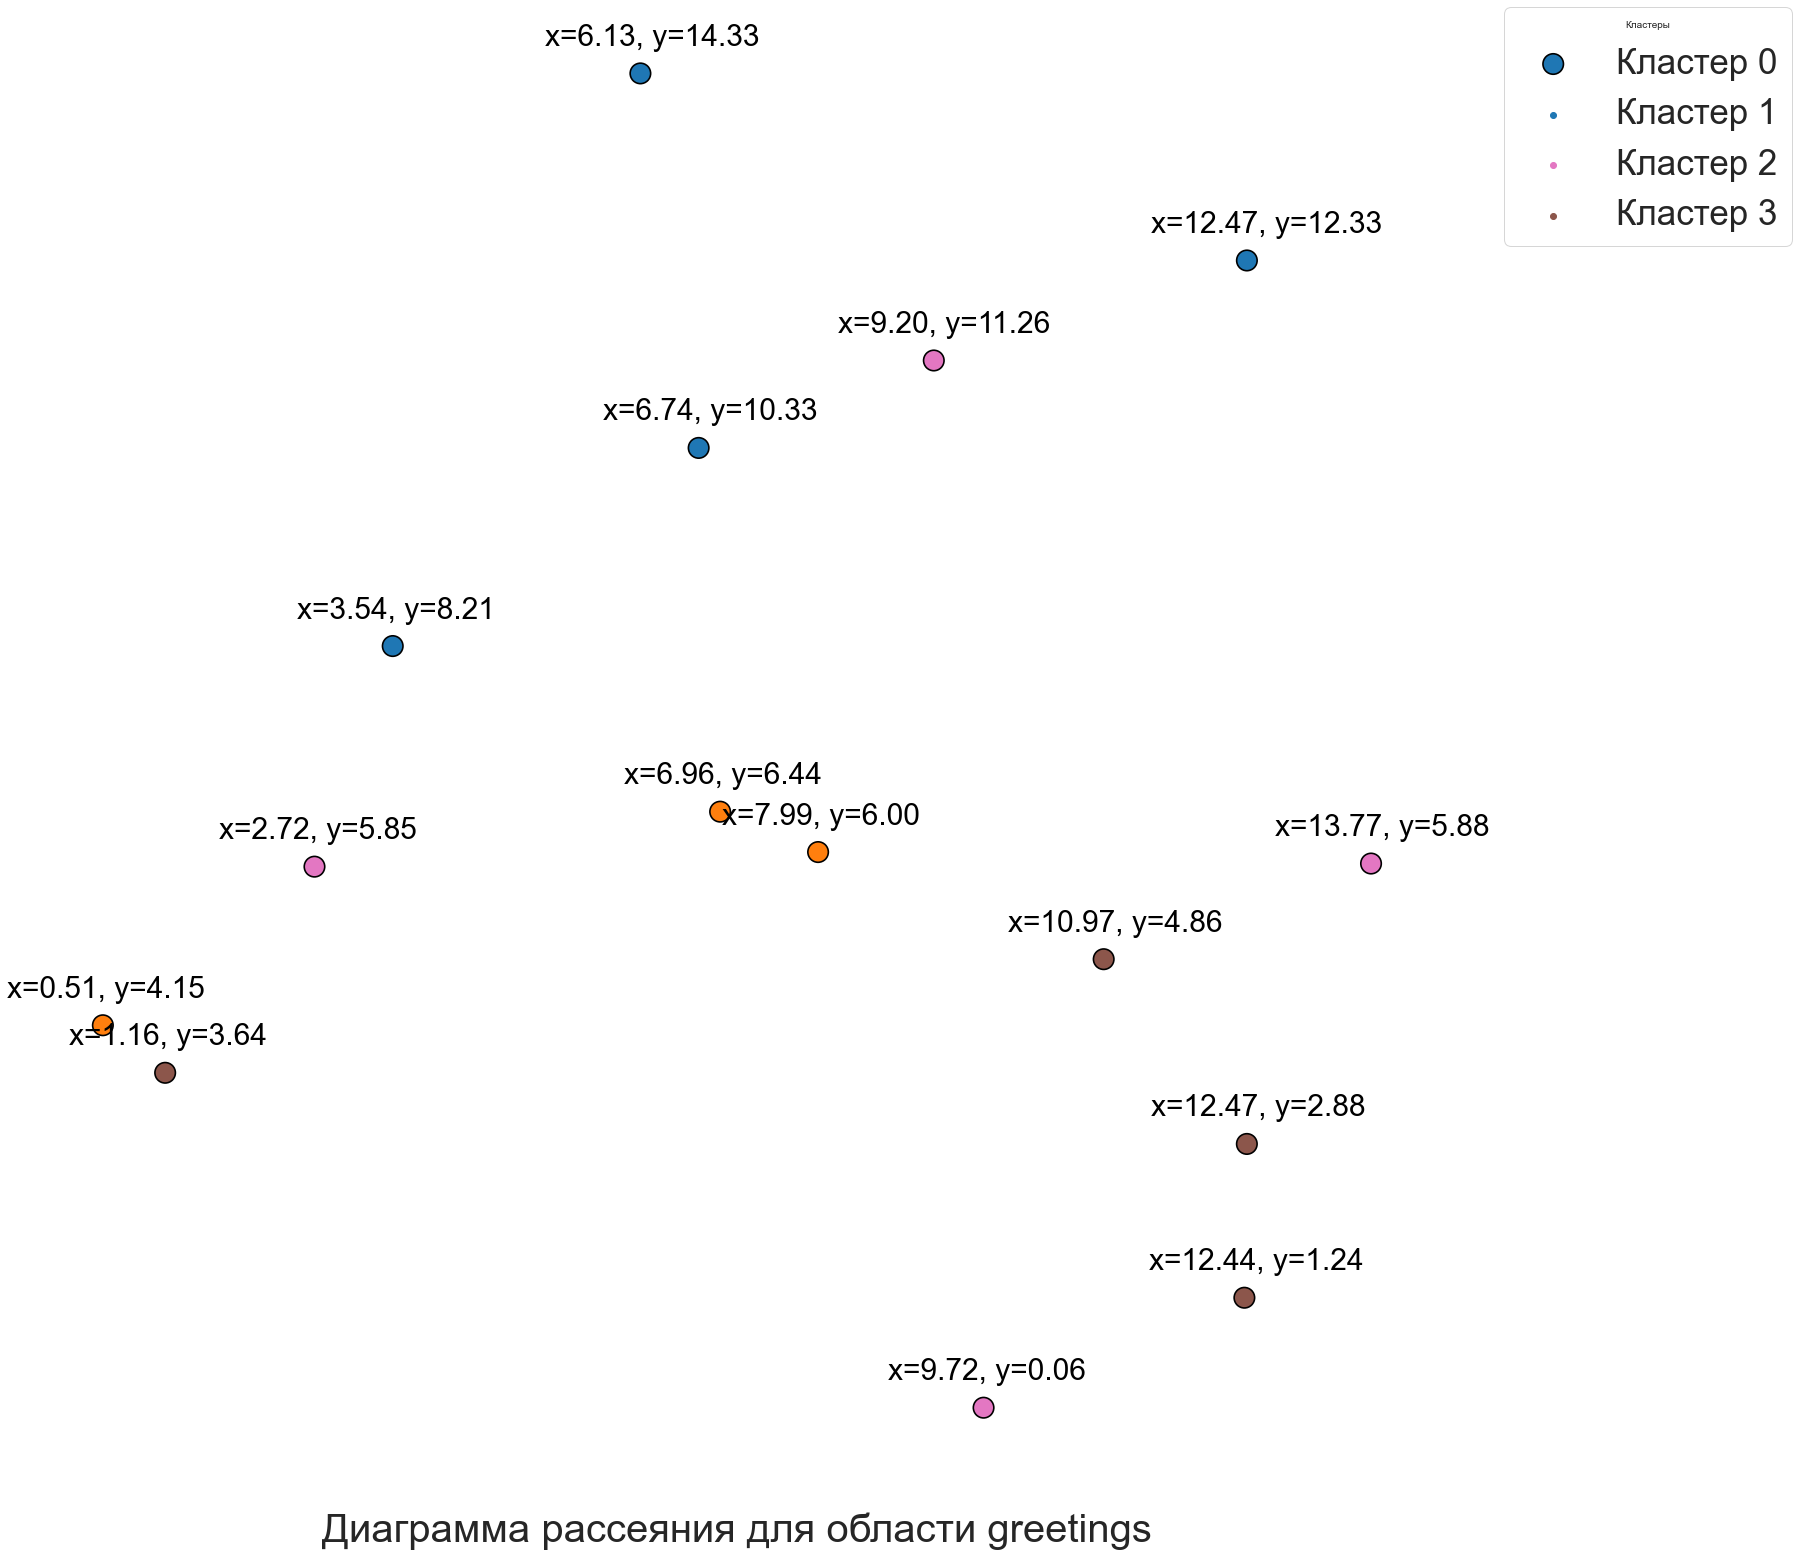

In [28]:
for area in area_list:
    #df = create_df_with(x)
    
    plt.figure(figsize=(25,27))
    g = sns.scatterplot(
    data = df_sorted[df_sorted['area']==area],
    s=420,
    x="x", 
    y="y",   
    hue='cluster', 
    palette=df_sorted[df_sorted['area']==area].groupby('cluster').last()['color'].to_dict(),
    edgecolor="black",
    legend=True
    )
    sns.despine(bottom = True, left = True)
    for x, y in zip(df_sorted[df_sorted['area']==area]['x'], df_sorted[df_sorted['area']==area]['y']):
        plt.text(x = x-1, 
        y = y+0.3, 
        s = f"x={'{:.2f}'.format(x)}, y={'{:.2f}'.format(y)}", fontsize=30,
        color = 'black') 
    plt.title(f'Диаграмма рассеяния для области {area}', fontsize = 40, y=-0.05)    
    plt.axis('off')
    plt.legend(title='Кластеры', fontsize=35, bbox_to_anchor=(1.05, 1), loc='upper left',
           labels=['Кластер 0','Кластер 1','Кластер 2','Кластер 3'], borderaxespad=0)
    plt.show(g)
    

## Вывод
Во второй части задания были построены диаграммы рассеяния по областям, настроена визуализация